# Í≥µÏú†Ïò§ÌîºÏä§ Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù (Î®∏Ïã†Îü¨Îãù)
    - Í≥µÏú†Ïò§ÌîºÏä§ Îç∞Ïù¥ÌÑ∞ Í∏∞Î∞ò Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù

## Î∂ÑÏÑù Î™©Ìëú
    - Ïú†Ï†ÄÏùò Î∞©Î¨∏Í∏∞Î°ùÏùÑ Î∞îÌÉïÏúºÎ°ú ÏµúÏ¢Ö Í≤∞Ï†úÎ•º ÏßÑÌñâÌñàÎäîÏßÄÏóê ÎåÄÌïú Î™®Îç∏ÎßÅ
    - Ïù¥Î•º ÌÜµÌïú ÎπÑÏ¶àÎãàÏä§ Ï†ÑÎûµÏùÑ Ï†úÏïàÌïòÎäî Í≤ÉÏù¥ Î™©Ìëú

## ÌôòÍ≤ΩÏÑ§Ï†ï

In [1]:
# ‚ñ∂ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ïÌïòÍ∏∞
# !pip install koreanize-matplotlib -q

import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

import warnings
warnings.filterwarnings("ignore")

## Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [2]:
site_area = pd.read_csv('data/site_area.csv')
trial_access_log = pd.read_csv('data/trial_access_log.csv')
trial_payment = pd.read_csv('data/trial_payment.csv')
trial_register = pd.read_csv('data/trial_register.csv')
trial_visit_info = pd.read_csv('data/trial_visit_info.csv')

## ÌïúÍµ≠ÏãúÍ∞ÑÏúºÎ°ú Î≥ÄÌôò

In [3]:
# UTC ‚Üí KST Î≥ÄÌôò Ìï®Ïàò
def convert_utc_to_kst(df, column):
    if column in df.columns:
        df[column] = pd.to_datetime(df[column], errors='coerce', utc=True).dt.tz_convert('Asia/Seoul')
    return df

# Ïª¨ÎüºÎ≥Ñ Î≥ÄÌôò Ï†ÅÏö©
# trial_visit_info: first_enter_time, last_leave_time
trial_visit_info = convert_utc_to_kst(trial_visit_info, "first_enter_time")
trial_visit_info = convert_utc_to_kst(trial_visit_info, "last_leave_time")

# trial_access_log: cdate
trial_access_log = convert_utc_to_kst(trial_access_log, "cdate")
trial_access_log = convert_utc_to_kst(trial_access_log, "open_date")

# trial_register: datetime Ïª¨ÎüºÎ™Ö ÌôïÏù∏ ÌõÑ Î≥ÄÌôò (Ïòà: register_datetime ÎòêÎäî Ïã†Ï≤≠Ïùº Îì±)
trial_register = convert_utc_to_kst(trial_register, "register_datetime")  # Ìï¥Îãπ Ïª¨Îüº Ï°¥Ïû¨ Ïãú Ï†ÅÏö©

## Í∏∞Î≥∏ EDA

### trial_register (3ÏùºÏ≤¥Ìóò Ïã†Ï≤≠)

- Ï¥ù 9,659Í±¥Ïùò Ïã†Ï≤≠ Ï§ë, 9,421Î™ÖÏù¥ Ïú†ÏùºÌïú ÏÇ¨Ïö©Ïûê
- Ï§ëÎ≥µ Ïã†Ï≤≠ Ïú†Ï†Ä 35Î™Ö
	- Í∞ôÏùÄ ÎÇ† 2Ìöå Ïã†Ï≤≠ -> Ï†ÑÏÇ∞ Ïò§Î•ò
		- 28Î™Ö
		- user_uuid Í∏∞Ï§ÄÏúºÎ°ú trial_date Ï§ëÎ≥µ Ï†úÍ±∞
	- Îã§Î•∏ ÎÇ† 2Ìöå Ïã†Ï≤≠ -> Ïû¨Ïã†Ï≤≠ ÏºÄÏù¥Ïä§
		- 7Î™Ö
		- Ï≤´ Ïã†Ï≤≠ ÌõÑ Ïã§Ï†ú Î∞©Î¨∏ÌïòÏßÄ ÏïäÍ≥†, Ïû¨Ïã†Ï≤≠ÏùÑ ÌÜµÌï¥ Ïù¥Ïö©Ìïú ÏºÄÏù¥Ïä§Î°ú Î≥¥ÏûÑ
			- Í∞ÄÏû• ÏµúÍ∑º Ïã†Ï≤≠ Í∏∞Ï§ÄÏúºÎ°ú 1Í±¥Îßå ÎÇ®ÍπÄ

In [4]:
trial_register.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   trial_date  9659 non-null   object
 1   user_uuid   9659 non-null   object
dtypes: object(2)
memory usage: 151.1+ KB


In [5]:
trial_register['user_uuid'].nunique()

9624

In [6]:
# 1. Ï§ëÎ≥µ Ïã†Ï≤≠Ìïú Ïú†Ï†ÄÎßå Ï∂îÏ∂ú
dupe_users = trial_register[trial_register['user_uuid'].duplicated(keep=False)]

# 2. Ïú†Ï†ÄÎ≥Ñ Ïã†Ï≤≠Ïùº Ïàò Í≥ÑÏÇ∞
user_trial_dates = dupe_users.groupby('user_uuid')['trial_date'].nunique().reset_index(name='unique_dates')

# 3. Í∞ôÏùÄ ÎÇ† Ï§ëÎ≥µ Ïã†Ï≤≠Ïûê
same_day_users = user_trial_dates[user_trial_dates['unique_dates'] == 1]['user_uuid']
same_day_duplicates = dupe_users[dupe_users['user_uuid'].isin(same_day_users)]

# 4. ÏÑúÎ°ú Îã§Î•∏ ÎÇ† Ï§ëÎ≥µ Ïã†Ï≤≠Ïûê
diff_day_users = user_trial_dates[user_trial_dates['unique_dates'] > 1]['user_uuid']
diff_day_duplicates = dupe_users[dupe_users['user_uuid'].isin(diff_day_users)]

# 5. Í±¥Ïàò Ï∂úÎ†•
print("‚úÖ Í∞ôÏùÄ ÎÇ† 2Ìöå Ïã†Ï≤≠")
print(f" - Ïú†Ï†Ä Ïàò: {same_day_users.nunique()}")
print(f" - Ï§ëÎ≥µ Ïã†Ï≤≠ Í±¥Ïàò: {same_day_duplicates.shape[0]}")

print("\n‚úÖ ÏÑúÎ°ú Îã§Î•∏ ÎÇ†Ïóê 2Ìöå Ïã†Ï≤≠")
print(f" - Ïú†Ï†Ä Ïàò: {diff_day_users.nunique()}")
print(f" - Ï§ëÎ≥µ Ïã†Ï≤≠ Í±¥Ïàò: {diff_day_duplicates.shape[0]}")


‚úÖ Í∞ôÏùÄ ÎÇ† 2Ìöå Ïã†Ï≤≠
 - Ïú†Ï†Ä Ïàò: 28
 - Ï§ëÎ≥µ Ïã†Ï≤≠ Í±¥Ïàò: 56

‚úÖ ÏÑúÎ°ú Îã§Î•∏ ÎÇ†Ïóê 2Ìöå Ïã†Ï≤≠
 - Ïú†Ï†Ä Ïàò: 7
 - Ï§ëÎ≥µ Ïã†Ï≤≠ Í±¥Ïàò: 14


In [7]:
# trial_visit_infoÎäî Ïù¥ÎØ∏ Î∂àÎü¨Ïò® ÏÉÅÌÉúÏù¥ÎØÄÎ°ú Î≥µÏÇ¨Î≥∏ ÏÇ¨Ïö©
visit_info = trial_visit_info.copy()
visit_info['date'] = pd.to_datetime(visit_info['date'])

# diff_day_duplicatesÏóê Ìï¥ÎãπÌïòÎäî Ïú†Ï†ÄÎì§Ïùò ÏµúÍ∑º Ïã†Ï≤≠Ïùº Íµ¨ÌïòÍ∏∞
dupe_users = trial_register[trial_register['user_uuid'].duplicated(keep=False)]
user_trial_dates = dupe_users.groupby('user_uuid')['trial_date'].nunique().reset_index(name='unique_dates')
diff_day_users = user_trial_dates[user_trial_dates['unique_dates'] > 1]['user_uuid']
diff_day_duplicates = dupe_users[dupe_users['user_uuid'].isin(diff_day_users)]

# ÎÇ†Ïßú Î≥ÄÌôò
diff_day_duplicates['trial_date'] = pd.to_datetime(diff_day_duplicates['trial_date'])
latest_trials = diff_day_duplicates.sort_values('trial_date').drop_duplicates('user_uuid', keep='last')

# Ìï¥Îãπ Ïú†Ï†ÄÎì§Ïùò ÏµúÍ∑º Ïã†Ï≤≠Ïùº Ïù¥Ï†Ñ Ïù¥Ïö©Í∏∞Î°ùÏù¥ ÏûàÎäîÏßÄ ÌôïÏù∏
latest_trials = latest_trials.rename(columns={'trial_date': 'latest_trial_date'})
visit_info_check = pd.merge(visit_info, latest_trials, on='user_uuid', how='inner')

# ÏµúÍ∑º Ïã†Ï≤≠Ïùº Ïù¥Ï†ÑÏóê Î∞©Î¨∏ Í∏∞Î°ùÏù¥ ÏûàÎäî Ïú†Ï†ÄÎßå ÌïÑÌÑ∞ÎßÅ
prior_visit_exists = visit_info_check[visit_info_check['date'] < visit_info_check['latest_trial_date']]['user_uuid'].unique()

# Ï¥ù Ï§ëÎ≥µ Ïú†Ï†Ä Ïàò ÎåÄÎπÑ ÎπÑÏú®
total_diff_day_users = latest_trials['user_uuid'].nunique()
prior_visit_count = len(prior_visit_exists)

{
    "ÏÑúÎ°ú Îã§Î•∏ ÎÇ† Ï§ëÎ≥µ Ïã†Ï≤≠ Ïú†Ï†Ä Ïàò": total_diff_day_users,
    "ÏµúÍ∑º Ïã†Ï≤≠Ïùº Ïù¥Ï†ÑÏóê Î∞©Î¨∏ Í∏∞Î°ùÏù¥ ÏûàÎäî Ïú†Ï†Ä Ïàò": prior_visit_count,
    "ÎπÑÏú® (%)": round((prior_visit_count / total_diff_day_users) * 100, 2)
}

{'ÏÑúÎ°ú Îã§Î•∏ ÎÇ† Ï§ëÎ≥µ Ïã†Ï≤≠ Ïú†Ï†Ä Ïàò': 7, 'ÏµúÍ∑º Ïã†Ï≤≠Ïùº Ïù¥Ï†ÑÏóê Î∞©Î¨∏ Í∏∞Î°ùÏù¥ ÏûàÎäî Ïú†Ï†Ä Ïàò': 0, 'ÎπÑÏú® (%)': 0.0}

#### trial_register Ïò§Î•òÍ∞í Ï≤òÎ¶¨

- Ï§ëÎ≥µ Ïã†Ï≤≠ Ïú†Ï†Ä 35Î™Ö
	- Í∞ôÏùÄ ÎÇ† 2Ìöå Ïã†Ï≤≠ -> Ï†ÑÏÇ∞ Ïò§Î•ò
		- 28Î™Ö
		- user_uuid Í∏∞Ï§ÄÏúºÎ°ú trial_date Ï§ëÎ≥µ Ï†úÍ±∞
	- Îã§Î•∏ ÎÇ† 2Ìöå Ïã†Ï≤≠ -> Ïû¨Ïã†Ï≤≠ ÏºÄÏù¥Ïä§
		- 7Î™Ö
		- Ï≤´ Ïã†Ï≤≠ ÌõÑ Ïã§Ï†ú Î∞©Î¨∏ÌïòÏßÄ ÏïäÍ≥†, Ïû¨Ïã†Ï≤≠ÏùÑ ÌÜµÌï¥ Ïù¥Ïö©Ìïú ÏºÄÏù¥Ïä§Î°ú Î≥¥ÏûÑ
			- Í∞ÄÏû• ÏµúÍ∑º Ïã†Ï≤≠ Í∏∞Ï§ÄÏúºÎ°ú 1Í±¥Îßå ÎÇ®ÍπÄ

In [8]:
trial_register_cleaned = trial_register.drop_duplicates(subset=['user_uuid', 'trial_date'])
trial_register_cleaned  = trial_register_cleaned.sort_values('trial_date').drop_duplicates(subset=['user_uuid'], keep='last')

In [9]:
trial_register_cleaned['user_uuid'].nunique()

9624

#### Ïã†Ï≤≠ÏõîÎ≥Ñ ÌèâÍ∑† Ï≤¥Î•òÏãúÍ∞Ñ ÎπÑÍµê (Í≤∞Ï†úÏûê vs ÎπÑÍ≤∞Ï†úÏûê)

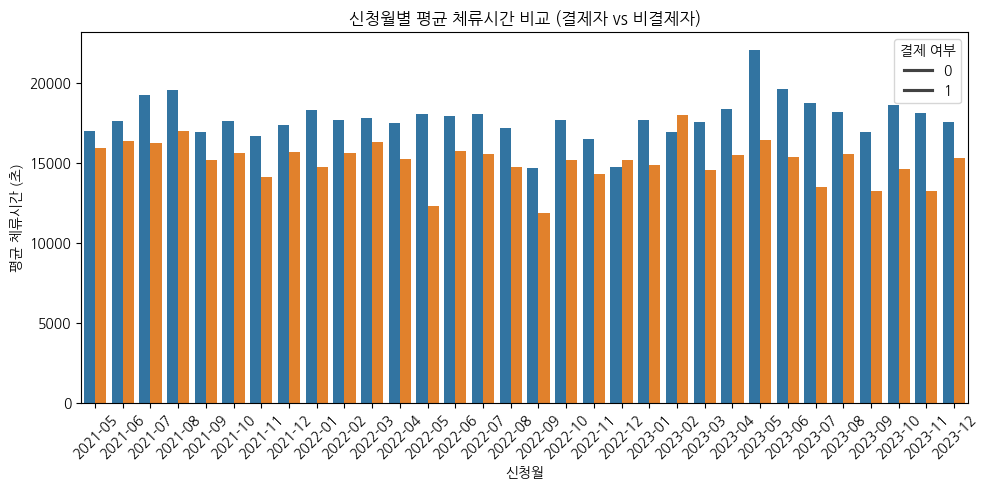

In [10]:
# trial_register_cleaned Î∂àÎü¨Ïò§Í∏∞
trial_register_cleaned['trial_date'] = pd.to_datetime(trial_register_cleaned['trial_date'])

# Í≤∞Ï†ú Ïó¨Î∂Ä Ï†ïÎ≥¥ Î≥ëÌï©
register_with_payment = pd.merge(trial_register_cleaned, trial_payment, on='user_uuid', how='left')

# Î∞©Î¨∏ Í∏∞Î°ùÍ≥º Î≥ëÌï©
visit_info = trial_visit_info.copy()
visit_info['date'] = pd.to_datetime(visit_info['date'])

# Ï≤¥Î•òÏãúÍ∞Ñ ÏßëÍ≥ÑÎ•º ÏúÑÌï¥ Ïã†Ï≤≠Ïùº Í∏∞Ï§ÄÏúºÎ°ú visitÍ≥º Îß§Ìïë
register_visit_merged = pd.merge(visit_info, register_with_payment, on='user_uuid', how='inner')

# Ïã†Ï≤≠Ìïú Îã¨ Í≥ÑÏÇ∞
register_visit_merged['Ïã†Ï≤≠Ïõî'] = register_visit_merged['trial_date'].dt.to_period('M').astype(str)

# Ïú†Ï†ÄÎ≥Ñ Ïã†Ï≤≠Ïõî + Í≤∞Ï†úÏó¨Î∂ÄÏóê Îî∞Î•∏ Ï≤¥Î•òÏãúÍ∞Ñ ÌèâÍ∑† ÏßëÍ≥Ñ
stay_summary = register_visit_merged.groupby(['Ïã†Ï≤≠Ïõî', 'is_payment'])['stay_time_second'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(
    data=stay_summary,
    x='Ïã†Ï≤≠Ïõî',
    y='stay_time_second',
    hue=stay_summary['is_payment']
)
plt.title('Ïã†Ï≤≠ÏõîÎ≥Ñ ÌèâÍ∑† Ï≤¥Î•òÏãúÍ∞Ñ ÎπÑÍµê (Í≤∞Ï†úÏûê vs ÎπÑÍ≤∞Ï†úÏûê)')
plt.xlabel('Ïã†Ï≤≠Ïõî')
plt.ylabel('ÌèâÍ∑† Ï≤¥Î•òÏãúÍ∞Ñ (Ï¥à)')
plt.legend(title='Í≤∞Ï†ú Ïó¨Î∂Ä', labels=[0, 1])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
print(stay_summary[stay_summary['is_payment'] == 1]['stay_time_second'].median())

print(stay_summary[stay_summary['is_payment'] == 0]['stay_time_second'].median())

15305.479238555326
17699.663036591162


- ÎπÑÍ≤∞Ï†úÏûêÎäî ÎåÄÎ∂ÄÎ∂ÑÏùò Îã¨ÏóêÏÑú Í≤∞Ï†úÏûêÎ≥¥Îã§ ÌèâÍ∑† Ï≤¥Î•òÏãúÍ∞ÑÏù¥ Îçî Í∏∏ÏóàÏäµÎãàÎã§.

### trial_visit_info (3ÏùºÏ≤¥Ìóò Ïã†Ï≤≠Ïûê ÏùºÏûêÎ≥Ñ Î∞©Î¨∏Í∏∞Î°ù)

In [12]:
trial_visit_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11477 entries, 0 to 11476
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype                     
---  ------            --------------  -----                     
 0   site_id           11477 non-null  int64                     
 1   date              11477 non-null  object                    
 2   stay_time         11477 non-null  object                    
 3   stay_time_second  11477 non-null  int64                     
 4   first_enter_time  10124 non-null  datetime64[ns, Asia/Seoul]
 5   last_leave_time   10147 non-null  datetime64[ns, Asia/Seoul]
 6   user_uuid         11477 non-null  object                    
dtypes: datetime64[ns, Asia/Seoul](2), int64(2), object(3)
memory usage: 627.8+ KB


In [13]:
trial_visit_info['user_uuid'].nunique()

6534

In [14]:
trial_access_log['user_uuid'].nunique()

6026

In [15]:
trial_payment[trial_payment['is_payment'] == 1].nunique()

is_payment       1
user_uuid     3652
dtype: int64

In [16]:
trial_visit_info['user_uuid'].nunique()

6534

In [17]:
# stay_timeÏù¥ 30Ï¥à Ïù¥ÌïòÏù∏ Í≤ΩÏö∞
very_short = visit_info[visit_info['stay_time_second'] <= 30]

# stay_timeÏù¥ 24ÏãúÍ∞Ñ(86400Ï¥à) Ïù¥ÏÉÅÏù∏ Í≤ΩÏö∞
very_long = visit_info[visit_info['stay_time_second'] >= 86400]

# Í±¥Ïàò ÏöîÏïΩ
{
    "30Ï¥à Ïù¥Ìïò Ï≤¥Î•ò Í±¥Ïàò": len(very_short),
    "24ÏãúÍ∞Ñ Ïù¥ÏÉÅ Ï≤¥Î•ò Í±¥Ïàò": len(very_long)
}

{'30Ï¥à Ïù¥Ìïò Ï≤¥Î•ò Í±¥Ïàò': 16, '24ÏãúÍ∞Ñ Ïù¥ÏÉÅ Ï≤¥Î•ò Í±¥Ïàò': 0}

#### Ï≤¥Î•òÏãúÍ∞Ñ Î∂ÑÌè¨

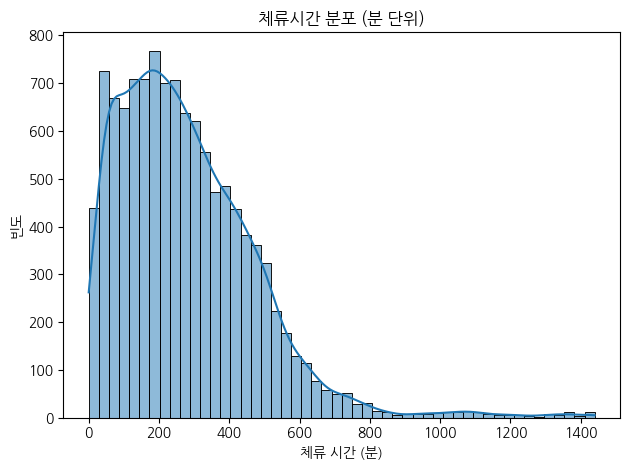

In [18]:
# ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Î≥µÏÇ¨Î≥∏ ÏÉùÏÑ±
eda_df = trial_visit_info.copy()

# ÎÇ†Ïßú Ïª¨Îüº Î≥ÄÌôò
eda_df['date'] = pd.to_datetime(eda_df['date'])
eda_df['weekday'] = eda_df['date'].dt.day_name()
eda_df['month'] = eda_df['date'].dt.to_period('M')

# Ï≤¥Î•ò ÏãúÍ∞Ñ Î∂Ñ Îã®ÏúÑÎ°ú Î≥ÄÌôò
eda_df['stay_minutes'] = eda_df['stay_time_second'] / 60

# Ï≤¥Î•òÏãúÍ∞Ñ Î∂ÑÌè¨
fig1, ax1 = plt.subplots()
sns.histplot(eda_df['stay_minutes'], bins=50, kde=True, ax=ax1)
ax1.set_title('Ï≤¥Î•òÏãúÍ∞Ñ Î∂ÑÌè¨ (Î∂Ñ Îã®ÏúÑ)')
ax1.set_xlabel('Ï≤¥Î•ò ÏãúÍ∞Ñ (Î∂Ñ)')
ax1.set_ylabel('ÎπàÎèÑ')

plt.tight_layout()
plt.show()

- ÎåÄÎ∂ÄÎ∂ÑÏùò Ïù¥Ïö©ÏûêÎäî 30Î∂ÑÏóêÏÑú 3ÏãúÍ∞Ñ ÏÇ¨Ïù¥Ïóê Ï≤¥Î•òÌïòÎäî Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨ÏäµÎãàÎã§.
- ÏùºÎ∂Ä Ïù¥Ïö©ÏûêÎäî 4ÏãúÍ∞Ñ Ïù¥ÏÉÅ Ïû•ÏãúÍ∞Ñ Ï≤¥Î•òÌïòÎäî Í≤ΩÏö∞ÎèÑ ÏûàÏóàÏäµÎãàÎã§.

#### ÏöîÏùºÎ≥Ñ Î∞©Î¨∏ Ïàò

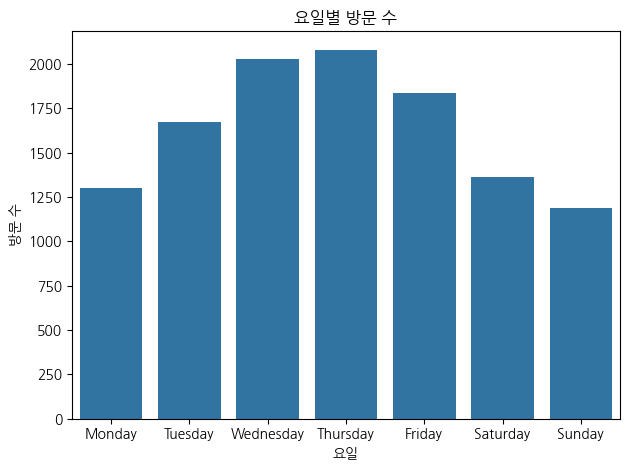

In [19]:
fig2, ax2 = plt.subplots()
sns.countplot(x='weekday', data=eda_df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ax=ax2)
ax2.set_title('ÏöîÏùºÎ≥Ñ Î∞©Î¨∏ Ïàò')
ax2.set_xlabel('ÏöîÏùº')
ax2.set_ylabel('Î∞©Î¨∏ Ïàò')

plt.tight_layout()
plt.show()

- ÌôîÏöîÏùºÎ∂ÄÌÑ∞ Í∏àÏöîÏùºÍπåÏßÄ Î∞©Î¨∏ÏûêÍ∞Ä ÎßéÏïòÏúºÎ©∞, Ï£ºÎßêÏóêÎäî ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Ï†ÅÏùÄ Ìé∏Ïù¥ÏóàÏäµÎãàÎã§.
	- ÌèâÏùº Ï§ëÏã¨ÏúºÎ°ú ÏÑúÎπÑÏä§Í∞Ä Ï£ºÎ°ú Ïù¥Ïö©ÎêòÍ≥† ÏûàÎäî Í≤ÉÏúºÎ°ú Ìï¥ÏÑùÎê©ÎãàÎã§.


#### ÏõîÎ≥Ñ Î∞©Î¨∏ Ïàò

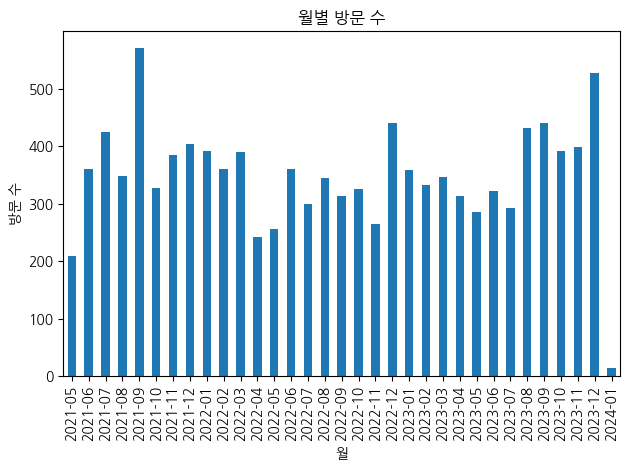

In [20]:
monthly_counts = eda_df['month'].value_counts().sort_index()
fig3, ax3 = plt.subplots()
monthly_counts.plot(kind='bar', ax=ax3)
ax3.set_title('ÏõîÎ≥Ñ Î∞©Î¨∏ Ïàò')
ax3.set_xlabel('Ïõî')
ax3.set_ylabel('Î∞©Î¨∏ Ïàò')

plt.tight_layout()
plt.show()

#### ÏßÄÏ†êÎ≥Ñ ÌèâÍ∑† Ï≤¥Î•ò ÏãúÍ∞Ñ

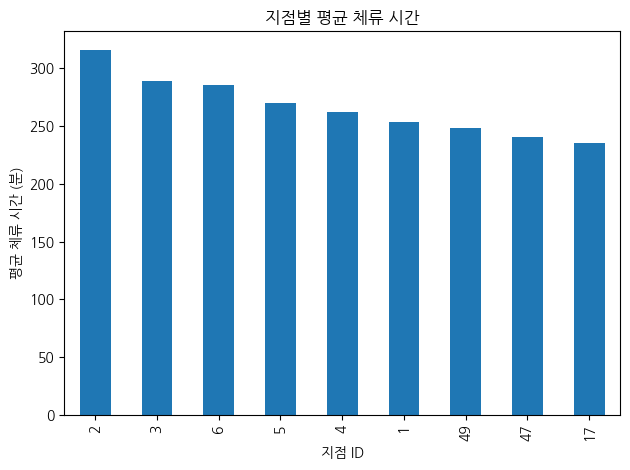

In [21]:
site_mean_stay = eda_df.groupby('site_id')['stay_minutes'].mean().sort_values(ascending=False)
fig4, ax4 = plt.subplots()
site_mean_stay.plot(kind='bar', ax=ax4)
ax4.set_title('ÏßÄÏ†êÎ≥Ñ ÌèâÍ∑† Ï≤¥Î•ò ÏãúÍ∞Ñ')
ax4.set_xlabel('ÏßÄÏ†ê ID')
ax4.set_ylabel('ÌèâÍ∑† Ï≤¥Î•ò ÏãúÍ∞Ñ (Î∂Ñ)')

plt.tight_layout()
plt.show()

### trial_access_log (3ÏùºÏ≤¥Ìóò Ïã†Ï≤≠Ïûê Ï∂úÏûÖÍ∏∞Î°ù)

In [22]:
trial_access_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63708 entries, 0 to 63707
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype                     
---  ------     --------------  -----                     
 0   id         63708 non-null  int64                     
 1   checkin    63708 non-null  int64                     
 2   cdate      63708 non-null  datetime64[ns, Asia/Seoul]
 3   site_id    63708 non-null  int64                     
 4   user_uuid  63708 non-null  object                    
dtypes: datetime64[ns, Asia/Seoul](1), int64(3), object(1)
memory usage: 2.4+ MB


In [23]:
# Ï†ÑÏ≤òÎ¶¨: datetime Î≥ÄÌôò, ÏûÖÌá¥Ïã§ Ïù¥Î¶Ñ ÏßÄÏ†ï
trial_access_log['cdate'] = pd.to_datetime(trial_access_log['cdate'])
trial_access_log['hour'] = trial_access_log['cdate'].dt.hour
trial_access_log['weekday'] = trial_access_log['cdate'].dt.day_name()
trial_access_log['date'] = trial_access_log['cdate'].dt.date

# ÏûÖÏã§/Ìá¥Ïã§ ÏΩîÎìú Ìï¥ÏÑù
checkin_map = {1: 'IN', 2: 'OUT'}
trial_access_log['checkin_type'] = trial_access_log['checkin'].map(checkin_map)

# ÏûÖÏã§/Ìá¥Ïã§ ÎπÑÏú®
in_out_counts = trial_access_log['checkin_type'].value_counts()

# ÏöîÏùºÎ≥Ñ Ï∂úÏûÖ Î°úÍ∑∏ Ïàò
weekday_counts = trial_access_log['weekday'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# ÏãúÍ∞ÑÎåÄÎ≥Ñ Ï∂úÏûÖ Î°úÍ∑∏ Ïàò
hourly_counts = trial_access_log['hour'].value_counts().sort_index()

#### ÏûÖÏã§ Î∞è Ìá¥Ïã§ Î°úÍ∑∏ Ïàò ÎπÑÍµê

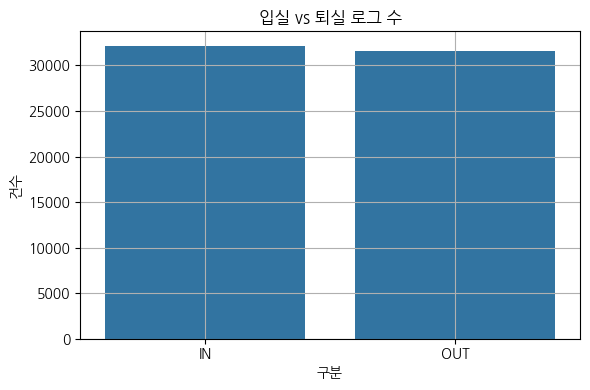

In [24]:
# ÏûÖÏã§ vs Ìá¥Ïã§ Î°úÍ∑∏ Ïàò
plt.figure(figsize=(6, 4))
sns.barplot(x=in_out_counts.index, y=in_out_counts.values)
plt.title("ÏûÖÏã§ vs Ìá¥Ïã§ Î°úÍ∑∏ Ïàò")
plt.xlabel("Íµ¨Î∂Ñ")
plt.ylabel("Í±¥Ïàò")
plt.grid(True)
plt.tight_layout()
plt.show()

- Îëê Í∞íÏùÄ Í±∞Ïùò ÎèôÏùºÌïòÎÇò, ÏûÖÏã§ Î°úÍ∑∏(IN)Í∞Ä Ìá¥Ïã§ Î°úÍ∑∏(OUT)Î≥¥Îã§ ÏïΩÍ∞Ñ Îçî ÎßéÏäµÎãàÎã§.

#### ÏãúÍ∞ÑÎåÄÎ≥Ñ Ï∂úÏûÖ Î°úÍ∑∏ Ïàò

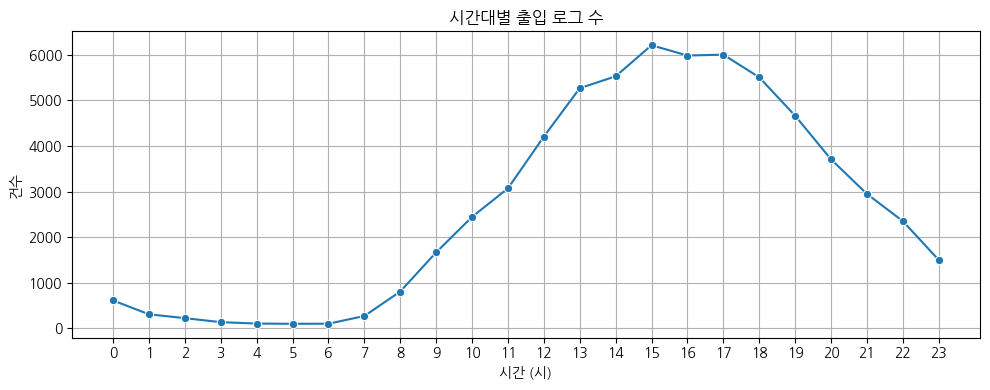

In [25]:
plt.figure(figsize=(10, 4))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker="o")
plt.title("ÏãúÍ∞ÑÎåÄÎ≥Ñ Ï∂úÏûÖ Î°úÍ∑∏ Ïàò")
plt.xlabel("ÏãúÍ∞Ñ (Ïãú)")
plt.ylabel("Í±¥Ïàò")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

- Ïò§Ï†Ñ 9ÏãúÎ∂ÄÌÑ∞ Ï∂úÏûÖÏù¥ Í∏âÏ¶ù
    - Ïò§Ï†Ñ 9ÏãúÎ∂ÄÌÑ∞ Ï∂úÏûÖ Î°úÍ∑∏Í∞Ä Î≥∏Í≤©Ï†ÅÏúºÎ°ú Ï¶ùÍ∞ÄÌïòÎ©∞, Ïò§ÌõÑ 3Ïãú(15Ïãú)Ïóê ÏµúÎåÄÏπò(ÏïΩ 6,200Í±¥ Ïù¥ÏÉÅ)Î•º Í∏∞Î°ùÌï©ÎãàÎã§.

- Ïò§ÌõÑ 4Ïãú~6ÏãúÍπåÏßÄÎèÑ ÎÜíÏùÄ Ïù¥Ïö© Ïú†ÏßÄ
    - Ïò§ÌõÑ 16Ïãú~18ÏãúÏóêÎèÑ ÎßéÏùÄ Ï∂úÏûÖÏù¥ Ïú†ÏßÄÎêòÍ≥† ÏûàÏñ¥, Ïû•ÏãúÍ∞Ñ Ï≤¥Î•òÌïòÍ±∞ÎÇò Ïò§ÌõÑ ÌÉÄÏûÑ ÎØ∏ÌåÖ Îì±ÏúºÎ°ú Ïù¥Ïö©Ïù¥ ÏßÄÏÜçÎêòÎäî Í≤ÉÏúºÎ°ú Î≥¥ÏûÖÎãàÎã§.

- Ï†ÄÎÖÅ Ïù¥ÌõÑ Ï†êÏ∞® Í∞êÏÜå
    - 19Ïãú Ïù¥ÌõÑÎ∂ÄÌÑ∞ Ï∂úÏûÖ ÏàòÍ∞Ä Ï†êÏ∞® Í∞êÏÜåÌïòÎ©∞, 22Ïãú~23ÏãúÏóê Ïù¥Î•¥Î©¥ ÎåÄÎ∂ÄÎ∂ÑÏùò Ïù¥Ïö©Ïù¥ ÎßàÎ¨¥Î¶¨ÎêòÎäî Ìå®ÌÑ¥ÏùÑ Î≥¥ÏûÖÎãàÎã§.

- Ïã¨Ïïº ÏãúÍ∞ÑÎåÄÎäî Îß§Ïö∞ ÎÇÆÏùÄ Ï∂úÏûÖ
    - 0Ïãú~6Ïãú ÏÇ¨Ïù¥ÏóêÎäî Ï∂úÏûÖ Î°úÍ∑∏Í∞Ä Í±∞Ïùò ÏóÜÏñ¥, Ïù¥ ÏãúÍ∞ÑÎåÄÎäî ÏÇ¨Ïã§ÏÉÅ ÏÑúÎπÑÏä§ Ïù¥Ïö©Ïù¥ Í±∞Ïùò ÏóÜÎäî ÎπÑÌôúÏÑ± ÏãúÍ∞ÑÎåÄÎ°ú ÌåêÎã®Îê©ÎãàÎã§.



#### ÏßÄÏ†êÎ≥Ñ Ïö¥ÏòÅ Í∏∞Í∞Ñ(Ï∂úÏûÖ Î°úÍ∑∏ Í∏∞Ï§Ä) ÌôïÏù∏

In [26]:
trial_access_log['cdate'] = pd.to_datetime(trial_access_log['cdate'])

# ÏßÄÏ†êÎ≥Ñ Ïù¥Ïö© ÏãúÏûëÏùºÍ≥º Ï¢ÖÎ£åÏùº Íµ¨ÌïòÍ∏∞
site_periods = trial_access_log.groupby("site_id")["cdate"].agg(["min", "max"]).reset_index()
site_periods.columns = ["site_id", "start_date", "end_date"]

site_periods

site_id                       start_date                         end_date
0        1 2021-05-03 14:20:36.931652+09:00 2023-12-30 19:41:24.360807+09:00
1        2 2021-05-06 14:48:22.282740+09:00 2023-12-31 00:30:23.735595+09:00
2        3 2021-05-02 18:42:13.893455+09:00 2024-01-01 23:36:13.987243+09:00
3        4 2021-05-12 09:34:48.235545+09:00 2024-01-01 18:38:05.941027+09:00
4        5 2021-09-03 10:00:16.574002+09:00 2023-10-14 21:31:26.409452+09:00
5        6 2021-11-15 15:33:11.639395+09:00 2024-01-01 23:17:30.522273+09:00
6       17 2022-08-08 09:22:41.367042+09:00 2024-01-01 19:02:49.172444+09:00
7       47 2022-12-09 09:13:28.695039+09:00 2024-01-01 18:54:14.311123+09:00
8       49 2023-04-22 13:57:18.815252+09:00 2023-12-30 11:42:32.858141+09:00

- ÏßÄÏ†êÎ≥Ñ ÏµúÏ¥à Ï∂úÏûÖÍ∏∞Î°ùÏù¥ ÏÑúÎ°ú Îã§Î•∏ ÏãúÏ†êÏóê ÏãúÏûëÎêú Í≤ÉÏúºÎ°ú Î≥¥ÏïÑ Ï§ëÍ∞ÑÏóê ÏÉàÎ°ú ÏÉùÏÑ±Îêú ÏßÄÏ†êÏù¥ ÏûàÏùåÏùÑ ÏãúÏÇ¨Ìï©ÎãàÎã§.

##### Ïã†Í∑ú Ïò§Ìîà Ïù¥ÌõÑ Î∞©Î¨∏Ïú®

In [27]:
# ÏßÄÏ†êÎ≥Ñ Ïò§ÌîàÏùº ÌååÏïÖ
site_open_dates = trial_access_log.groupby("site_id")["cdate"].min().reset_index()
site_open_dates.columns = ["site_id", "open_date"]
site_open_dates["open_month"] = site_open_dates["open_date"].dt.to_period("M")

# access_logÏóê open_month Î≥ëÌï©
trial_access_log = trial_access_log.merge(site_open_dates, on="site_id", how="left")

# Î∞©Î¨∏ Î°úÍ∑∏ÏóêÏÑú Î∞©Î¨∏Ïõî Íµ¨ÌïòÍ∏∞
trial_access_log["visit_month"] = trial_access_log["cdate"].dt.to_period("M")

# Ïò§Ìîà Ïù¥ÌõÑ Î∞©Î¨∏Îßå ÌïÑÌÑ∞ÎßÅ
after_open = trial_access_log[trial_access_log["visit_month"] >= trial_access_log["open_month"]]

# Ïò§Ìîà Ïù¥ÌõÑ ÏõîÎ≥Ñ Î∞©Î¨∏ Ïàò Í≥ÑÏÇ∞
visit_counts = after_open.groupby(["site_id", "visit_month"])["user_uuid"].nunique().reset_index()
visit_counts.columns = ["site_id", "visit_month", "unique_visitors"]
# site_id 1, 2, 3 Ï†úÏô∏Ìïú ÏßÄÏ†ê ÌïÑÌÑ∞ÎßÅ
filtered_visits = visit_counts[~visit_counts["site_id"].isin([1, 2, 3])]
filtered_visits

site_id visit_month  unique_visitors
97         4     2021-05               45
98         4     2021-06               59
99         4     2021-07               44
100        4     2021-08               31
101        4     2021-09               25
..       ...         ...              ...
219       49     2023-08               17
220       49     2023-09               17
221       49     2023-10               15
222       49     2023-11               20
223       49     2023-12               26

[127 rows x 3 columns]

###### ÏßÄÏ†êÎ≥ÑÎ°ú Í∞úÎ≥Ñ ÏãúÍ∞ÅÌôî

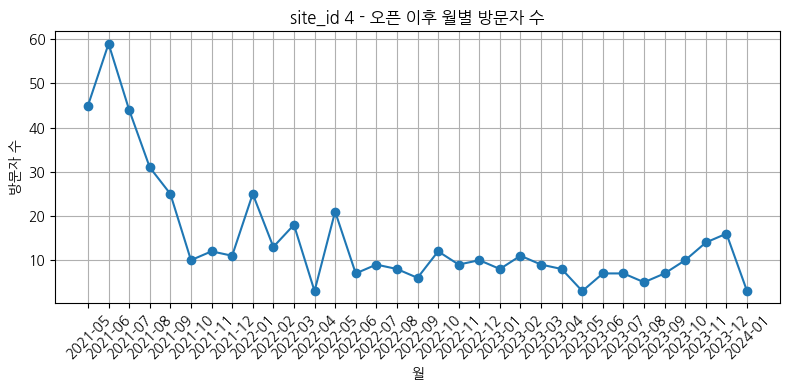

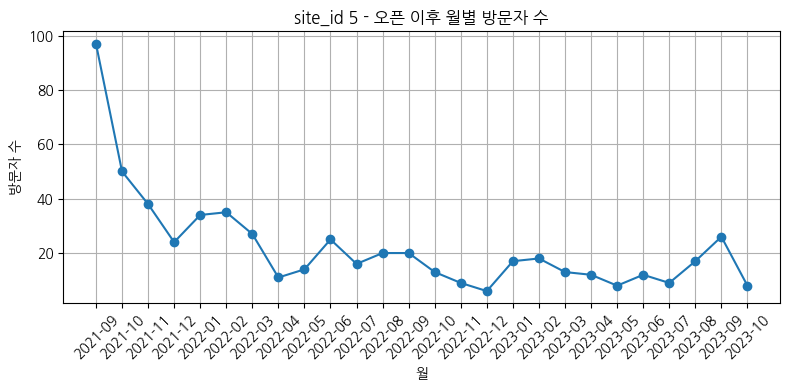

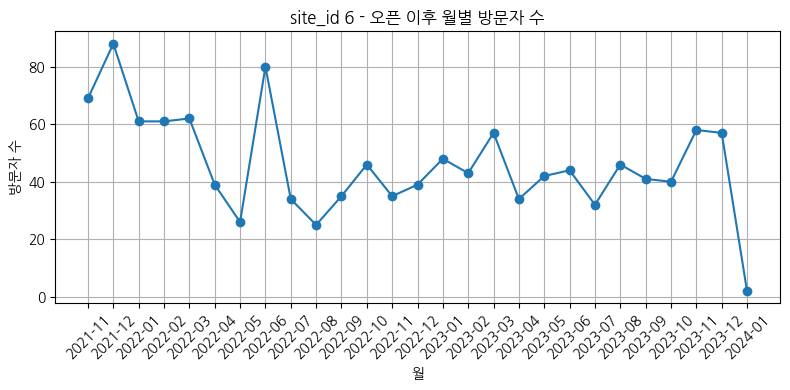

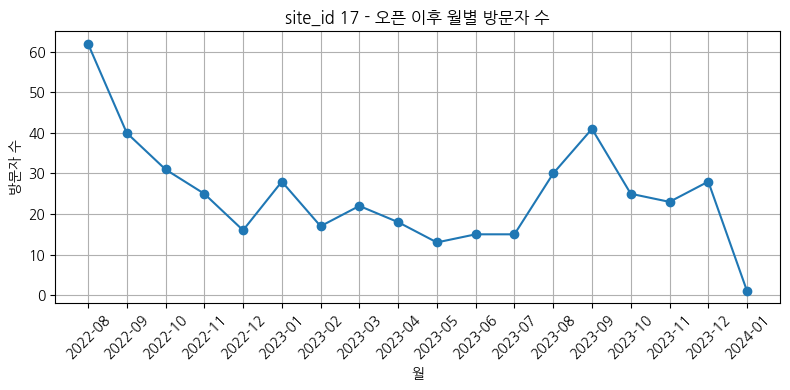

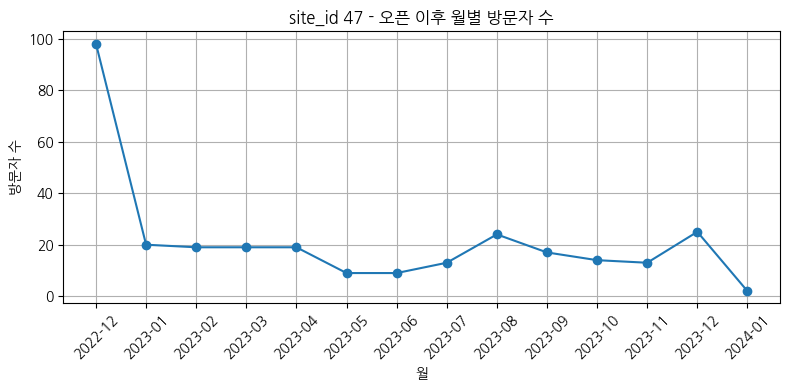

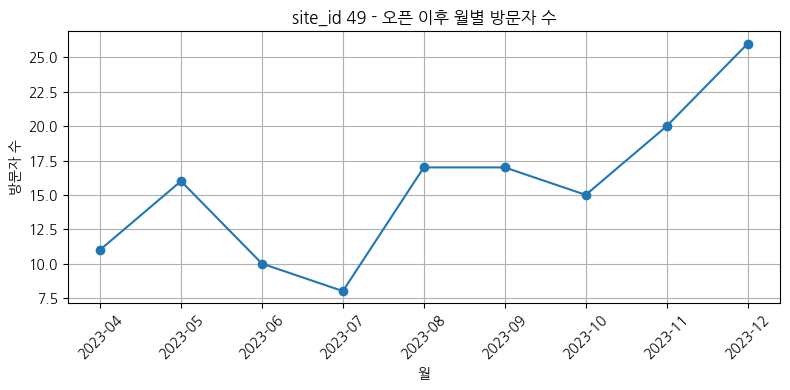

In [28]:
site_ids = filtered_visits["site_id"].unique()

for site in site_ids:
    site_df = filtered_visits[filtered_visits["site_id"] == site]
    plt.figure(figsize=(8, 4))
    plt.plot(site_df["visit_month"].astype(str), site_df["unique_visitors"], marker='o')
    plt.title(f"site_id {site} - Ïò§Ìîà Ïù¥ÌõÑ ÏõîÎ≥Ñ Î∞©Î¨∏Ïûê Ïàò")
    plt.xlabel("Ïõî")
    plt.ylabel("Î∞©Î¨∏Ïûê Ïàò")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

- ÎåÄÎ∂ÄÎ∂ÑÏùò ÏßÄÏ†êÏù¥ Ïò§Ìîà Ïù¥ÌõÑ Î∞©Î¨∏Ïú®Ïù¥ ÎÜíÍ≤å ÎÇòÏôîÏäµÎãàÎã§.

##### ÏßÄÏ†ê Ïò§Ìîà Ï≤´ Îã¨ vs Ïù¥ÌõÑ Î∞©Î¨∏Ïûê Ïàò ÎπÑÍµê

In [29]:
# Ï≤´ Î∞©Î¨∏Ïõî Î∞è Ïù¥ÌõÑ Î∞©Î¨∏Ïõî Íµ¨Î∂Ñ
first_vs_after = filtered_visits.merge(site_open_dates[["site_id", "open_month"]], on="site_id", how="left")
first_vs_after["is_open_month"] = first_vs_after["visit_month"] == first_vs_after["open_month"]

# Ï≤´ Îã¨ Î∞©Î¨∏ÏûêÏàò
first_month_visits = (
    first_vs_after[first_vs_after["is_open_month"]]
    .groupby("site_id")["unique_visitors"]
    .first()
    .reset_index()
    .rename(columns={"unique_visitors": "open_month_visitors"})
)

# Ïù¥ÌõÑ ÌèâÍ∑† Î∞©Î¨∏ÏûêÏàò
after_month_visits = (
    first_vs_after[~first_vs_after["is_open_month"]]
    .groupby("site_id")["unique_visitors"]
    .mean()
    .reset_index()
    .rename(columns={"unique_visitors": "after_avg_visitors"})
)

# Î≥ëÌï© ÌõÑ ÎπÑÍµê
visit_compare = first_month_visits.merge(after_month_visits, on="site_id", how="left")
visit_compare["relative_ratio"] = visit_compare["open_month_visitors"] / visit_compare["after_avg_visitors"]

visit_compare

site_id  open_month_visitors  after_avg_visitors  relative_ratio
0        4                   45           13.781250        3.265306
1        5                   97           19.280000        5.031120
2        6                   69           45.192308        1.526809
3       17                   62           22.823529        2.716495
4       47                   98           15.615385        6.275862
5       49                   11           16.125000        0.682171

###### Ïò§Ìîà Ï≤´ Îã¨ ÎåÄÎπÑ Ïù¥ÌõÑ Î∞©Î¨∏Ïûê ÌèâÍ∑† ÎπÑÏú® ÏãúÍ∞ÅÌôî

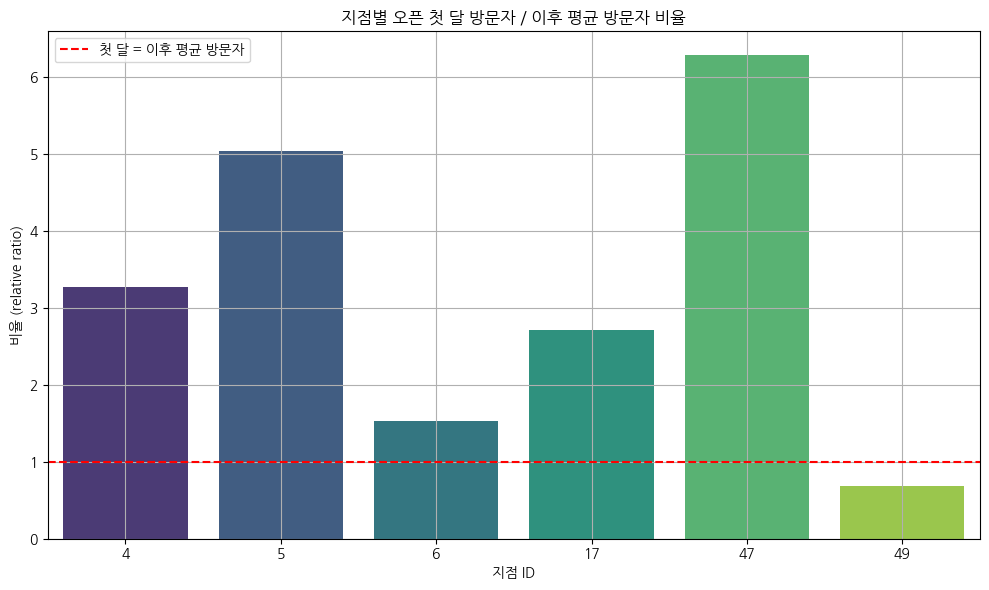

In [30]:
# Ï†ïÎ†¨ Í∏∞Ï§Ä: Ï≤´ Îã¨ ÎåÄÎπÑ ÎπÑÏú® ÎÜíÏùÄ Ïàú
plot_data = visit_compare.sort_values("relative_ratio", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=plot_data,
    x="site_id",
    y="relative_ratio",
    palette="viridis"
)
plt.axhline(1, color='red', linestyle='--', label='Ï≤´ Îã¨ = Ïù¥ÌõÑ ÌèâÍ∑† Î∞©Î¨∏Ïûê')
plt.title("ÏßÄÏ†êÎ≥Ñ Ïò§Ìîà Ï≤´ Îã¨ Î∞©Î¨∏Ïûê / Ïù¥ÌõÑ ÌèâÍ∑† Î∞©Î¨∏Ïûê ÎπÑÏú®")
plt.xlabel("ÏßÄÏ†ê ID")
plt.ylabel("ÎπÑÏú® (relative ratio)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- ÏßÄÏ†ê 47: Ïò§Ìîà Ï≤´ Îã¨ Î∞©Î¨∏Ïûê ÏàòÍ∞Ä Ïù¥ÌõÑ ÌèâÍ∑† ÎåÄÎπÑ ÏïΩ 6.3Î∞∞ Ïù¥ÏÉÅÏúºÎ°ú ÎÇòÌÉÄÎÇò, Ïò§Ìîà Ï¥àÍ∏∞Ïùò ÎßàÏºÄÌåÖÏù¥ÎÇò ÌôçÎ≥¥ Ìö®Í≥ºÍ∞Ä Îß§Ïö∞ Ïª∏Îçò Í≤ÉÏúºÎ°ú Ìï¥ÏÑùÎê©ÎãàÎã§.
- ÏßÄÏ†ê 5, 4: Í∞ÅÍ∞Å ÏïΩ 5.1Î∞∞, 3.3Î∞∞Î°ú Ïò§Ìîà Ï¥àÍ∏∞Ïóê Î∞©Î¨∏Ïù¥ ÏßëÏ§ëÎêú ÏñëÏÉÅÏùÑ Î≥¥ÏòÄÏäµÎãàÎã§.
- ÏßÄÏ†ê 6, 17: Î∞©Î¨∏Ïûê ÎπÑÏú®Ïù¥ 1~2Î∞∞ ÏÇ¨Ïù¥Î°ú, ÎπÑÍµêÏ†Å Í∑†Ìòï Ïû°Ìûå Î∞©Î¨∏ Ìå®ÌÑ¥ÏùÑ Î≥¥Ïù∏ ÏßÄÏ†êÎì§ÏûÖÎãàÎã§.
- ÏßÄÏ†ê 49: ÎπÑÏú®Ïù¥ 0.8 Ïù¥ÌïòÎ°ú, Ïò§ÌûàÎ†§ Ïò§Ìîà Ïù¥ÌõÑÏóê ÌèâÍ∑† Î∞©Î¨∏ÏûêÍ∞Ä Îçî ÎßéÏïòÎçò ÏßÄÏ†êÏúºÎ°ú ÌååÏïÖÎê©ÎãàÎã§.

### Ï†ÑÌôòÏú® ÎπÑÍµêÌïòÍ∏∞

In [31]:
conversion = trial_payment['is_payment'].value_counts().reset_index()

In [32]:
conversion

is_payment  count
0           0   5995
1           1   3664

In [33]:
con = conversion.loc[conversion['is_payment'] == 1, 'count'].iloc[0]
total = conversion['count'].sum()
rate = con / total

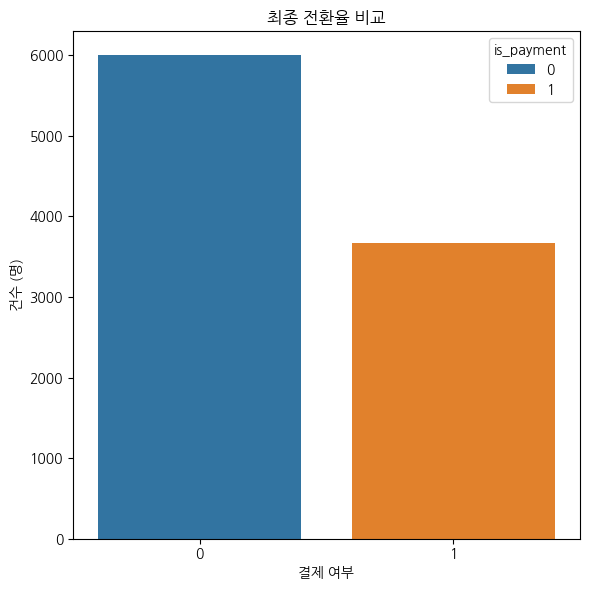

Ï†ÑÏ≤¥ Ïú†Ï†Ä ÎåÄÎπÑ Ï†ÑÌôòÏú®: 37.93%


In [34]:
fig, ax = plt.subplots(figsize=(6, 6))

# countplot: xÏóê Ïª¨ÎüºÎ™Ö Î¨∏ÏûêÏó¥ÏùÑ, ax Ïù∏Ïûê ÏßÄÏ†ï
sns.barplot(data=conversion, x='is_payment', y='count', hue='is_payment')

# ÌïúÍ∏Ä Î†àÏù¥Î∏î(ÏÑ†ÌÉù)
ax.set_title('ÏµúÏ¢Ö Ï†ÑÌôòÏú® ÎπÑÍµê')
ax.set_xlabel('Í≤∞Ï†ú Ïó¨Î∂Ä')
ax.set_ylabel('Í±¥Ïàò (Î™Ö)')

# ÎßâÎåÄ ÏúÑÏóê Í∞í ÌëúÏãú
plt.tight_layout()
plt.show()

print(f'Ï†ÑÏ≤¥ Ïú†Ï†Ä ÎåÄÎπÑ Ï†ÑÌôòÏú®: {rate:.2%}')

#### Î∞©Î¨∏Ïûê Ï†ÑÌôò Ïàò

In [35]:
# Ï†ÑÌôòÌïú Ïú†Ï†Ä
converted_user_uuid = trial_payment[trial_payment['is_payment'] == 1]['user_uuid']

# Î∞©Î¨∏ Í∏∞Î°ù Ï°¥Ïû¨ÌïòÎäî Í≤∞Ï†ú Ïú†Ï†ÄÎßå ÌïÑÌÑ∞ÎßÅ
visited = converted_user_uuid[converted_user_uuid.isin(trial_visit_info['user_uuid'])].nunique()

print(f'Î∞©Î¨∏ Í∏∞Î°ùÏù¥ Ï°¥Ïû¨ÌïòÎäî Í≤∞Ï†ú Ïú†Ï†Ä Ïàò: {visited}Î™Ö')

Î∞©Î¨∏ Í∏∞Î°ùÏù¥ Ï°¥Ïû¨ÌïòÎäî Í≤∞Ï†ú Ïú†Ï†Ä Ïàò: 2564Î™Ö


#### ÎØ∏Î∞©Î¨∏Ïûê Ï†ÑÌôò Ïàò

In [36]:
# Ï†ÑÌôòÌïú Ïú†Ï†Ä
converted_user_uuid = trial_payment[trial_payment['is_payment'] == 1]['user_uuid']

# Î∞©Î¨∏ Í∏∞Î°ùÏóê ÏóÜÎäî Í≤∞Ï†ú Ïú†Ï†ÄÎßå ÌïÑÌÑ∞ÎßÅ
not_visited = converted_user_uuid[~converted_user_uuid.isin(trial_visit_info['user_uuid'])].nunique()

print(f'Î∞©Î¨∏ Í∏∞Î°ù ÏóÜÎäî Í≤∞Ï†ú Ïú†Ï†Ä Ïàò: {not_visited}Î™Ö')

Î∞©Î¨∏ Í∏∞Î°ù ÏóÜÎäî Í≤∞Ï†ú Ïú†Ï†Ä Ïàò: 1088Î™Ö


# Î™®Îç∏ÎßÅ

## Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©

### trial_access_log Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï© (trial_visit_info Ï†úÏô∏)

In [37]:
# site_id Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï©
merged_df = trial_access_log.merge(site_area, on="site_id", how="left")

# area_pyeongÏùÑ site_id Î∞îÎ°ú Ïò§Î•∏Ï™ΩÏúºÎ°ú Ïù¥Îèô
cols = list(merged_df.columns)
# 'site_id' Îã§Ïùå ÏúÑÏπòÎ•º Í≥ÑÏÇ∞Ìï¥ÏÑú 'area_pyeong' ÏúÑÏπò Ï°∞Ï†ï
site_idx = cols.index("site_id")
cols.insert(site_idx + 1, cols.pop(cols.index("area_pyeong")))
merged_df = merged_df[cols]

# user_uuid Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï©
merged_df = merged_df.merge(trial_payment, on="user_uuid", how="left")

# is_payment Ïª¨ÎüºÏùÑ user_uuid Î∞îÎ°ú Ïò§Î•∏Ï™ΩÏúºÎ°ú Ïù¥Îèô
cols = list(merged_df.columns)
uuid_idx = cols.index("user_uuid")
cols.insert(uuid_idx + 1, cols.pop(cols.index("is_payment")))
merged_df = merged_df[cols]

# user_uuid Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï©
merged_df = merged_df.merge(trial_register, on="user_uuid", how="left")

# trial_dateÎ•º user_uuid ÏôºÏ™ΩÏúºÎ°ú Ïù¥Îèô
cols = list(merged_df.columns)
uuid_idx = cols.index("user_uuid")
cols.insert(uuid_idx, cols.pop(cols.index("trial_date")))
merged_df = merged_df[cols]

In [38]:
# datetime Ï≤òÎ¶¨
merged_df["cdate"] = pd.to_datetime(merged_df["cdate"])
merged_df["trial_date"] = pd.to_datetime(merged_df["trial_date"])
merged_df["cdate"] = merged_df["cdate"].dt.tz_localize(None)

 
# Ï≤¥Ìóò Ïã†Ï≤≠ Ïù¥ÌõÑÏùò ÌñâÎèôÎßå Í≥†Î†§Ìï† ÏàòÎèÑ ÏûàÏùå (ÏÑ†ÌÉù)
merged_df["days_since_trial"] = (merged_df["cdate"] - merged_df["trial_date"]).dt.days

# Ïú†Ï†ÄÎ≥Ñ Î∞©Î¨∏ ÌöüÏàò Î∞è ÏûÖÌá¥Ïã§ Î°úÍ∑∏ Ïàò
checkin_stats = (
    merged_df.groupby("user_uuid")
    .agg(
        total_visits=("id", "count"),
        total_checkins=("checkin", lambda x: (x == 1).sum()),
        total_checkouts=("checkin", lambda x: (x == 2).sum()),
        unique_visit_days=("cdate", lambda x: x.dt.date.nunique()),
        site_diversity=("site_id", "nunique"),
        avg_days_since_trial=("days_since_trial", "mean")
    )
)

In [39]:
checkin_stats

total_visits  total_checkins  \
user_uuid                                                            
000590dc-046f-462b-8225-4c81a97b7166             6               3   
000be14f-ba0f-4af6-bc2c-7b00dfcbc98c            18               9   
0018e22d-a2cc-4e06-bca2-d6a041770f3b            19              11   
002606d9-38ca-48f3-910c-cbfada9a9109             8               4   
002a7570-90dd-4cab-b0aa-b0e40f7ef27a            10               5   
...                                            ...             ...   
ffc79669-ed11-4cde-86d4-8ec232ac7b14             9               5   
ffcb7950-d150-40ae-a6bf-f85f5c2b9702            10               5   
ffce32ca-2efc-4485-b685-4b65811c2dcf             4               2   
ffd287bc-2797-4788-82fa-6268c82e7fa9            20              10   
fffbf2b3-7853-4c07-bd2a-aae686ac9013             7               4   

                                      total_checkouts  unique_visit_days  \
user_uuid                                                                  
000590dc-046f-462b-8225-4c81a97b7166                3                  1   
000be14f-ba0f-4af6-bc2c-7b00dfcbc98c                9                  2   
0018e22d-a2cc-4e06-bca2-d6a041770f3b                8                  2   
002606d9-38ca-48f3-910c-cbfada9a9109                4                  2   
002a7570-90dd-4cab-b0aa-b0e40f7ef27a                5                  1   
...                                               ...                ...   
ffc79669-ed11-4cde-86d4-8ec232ac7b14                4                  1   
ffcb7950-d150-40ae-a6bf-f85f5c2b9702                5                  2   
ffce32ca-2efc-4485-b685-4b65811c2dcf                2                  1   
ffd287bc-2797-4788-82fa-6268c82e7fa9               10                  2   
fffbf2b3-7853-4c07-bd2a-aae686ac9013                3                  1   

                                      site_diversity  avg_days_since_trial  
user_uuid                                                                   
000590dc-046f-462b-8225-4c81a97b7166               1              1.000000  
000be14f-ba0f-4af6-bc2c-7b00dfcbc98c               1              1.222222  
0018e22d-a2cc-4e06-bca2-d6a041770f3b               1              1.315789  
002606d9-38ca-48f3-910c-cbfada9a9109               1              1.500000  
002a7570-90dd-4cab-b0aa-b0e40f7ef27a               1              1.000000  
...                                              ...                   ...  
ffc79669-ed11-4cde-86d4-8ec232ac7b14               1              2.000000  
ffcb7950-d150-40ae-a6bf-f85f5c2b9702               1              1.600000  
ffce32ca-2efc-4485-b685-4b65811c2dcf               1              1.000000  
ffd287bc-2797-4788-82fa-6268c82e7fa9               1              1.600000  
fffbf2b3-7853-4c07-bd2a-aae686ac9013               1              1.000000  

[6026 rows x 6 columns]

### trial_visit_info ÌôúÏö© ÌååÏÉù Î≥ÄÏàò ÏÉùÏÑ±

In [40]:
trial_visit_info["date"] = pd.to_datetime(trial_visit_info["date"])

visit_stats = (
    trial_visit_info.groupby("user_uuid")
    .agg(
        total_stay_days=("date", "nunique"),
        avg_stay_time=("stay_time_second", "mean"),
        max_stay_time=("stay_time_second", "max"),
        total_stay_time=("stay_time_second", "sum"),
        site_visit_diversity=("site_id", "nunique")
    )
)

In [64]:
visit_stats

total_stay_days  avg_stay_time  \
user_uuid                                                              
000590dc-046f-462b-8225-4c81a97b7166                1   21417.000000   
000be14f-ba0f-4af6-bc2c-7b00dfcbc98c                3   15189.666667   
0018e22d-a2cc-4e06-bca2-d6a041770f3b                2   38686.000000   
002606d9-38ca-48f3-910c-cbfada9a9109                2   12512.000000   
002a7570-90dd-4cab-b0aa-b0e40f7ef27a                2   11804.500000   
...                                               ...            ...   
ffc79669-ed11-4cde-86d4-8ec232ac7b14                2   17292.500000   
ffcb7950-d150-40ae-a6bf-f85f5c2b9702                2   14806.500000   
ffce32ca-2efc-4485-b685-4b65811c2dcf                1    8450.000000   
ffd287bc-2797-4788-82fa-6268c82e7fa9                3   17618.333333   
fffbf2b3-7853-4c07-bd2a-aae686ac9013                1    6976.000000   

                                      max_stay_time  total_stay_time  \
user_uuid                                                              
000590dc-046f-462b-8225-4c81a97b7166          21417            21417   
000be14f-ba0f-4af6-bc2c-7b00dfcbc98c          25965            45569   
0018e22d-a2cc-4e06-bca2-d6a041770f3b          42900            77372   
002606d9-38ca-48f3-910c-cbfada9a9109          12689            25024   
002a7570-90dd-4cab-b0aa-b0e40f7ef27a          18722            23609   
...                                             ...              ...   
ffc79669-ed11-4cde-86d4-8ec232ac7b14          18169            34585   
ffcb7950-d150-40ae-a6bf-f85f5c2b9702          15154            29613   
ffce32ca-2efc-4485-b685-4b65811c2dcf           8450             8450   
ffd287bc-2797-4788-82fa-6268c82e7fa9          23702            52855   
fffbf2b3-7853-4c07-bd2a-aae686ac9013           6976             6976   

                                      site_visit_diversity  
user_uuid                                                   
000590dc-046f-462b-8225-4c81a97b7166                     1  
000be14f-ba0f-4af6-bc2c-7b00dfcbc98c                     1  
0018e22d-a2cc-4e06-bca2-d6a041770f3b                     1  
002606d9-38ca-48f3-910c-cbfada9a9109                     1  
002a7570-90dd-4cab-b0aa-b0e40f7ef27a                     1  
...                                                    ...  
ffc79669-ed11-4cde-86d4-8ec232ac7b14                     1  
ffcb7950-d150-40ae-a6bf-f85f5c2b9702                     1  
ffce32ca-2efc-4485-b685-4b65811c2dcf                     1  
ffd287bc-2797-4788-82fa-6268c82e7fa9                     1  
fffbf2b3-7853-4c07-bd2a-aae686ac9013                     1  

[6534 rows x 5 columns]

In [41]:
# Ïú†Ï†Ä Îã®ÏúÑ Í≤∞Ï†ú Ïó¨Î∂Ä: Í∞ÄÏû• ÎßàÏßÄÎßâ Î°úÍ∑∏ Í∏∞Ï§Ä (ÌòπÏùÄ max ÏÇ¨Ïö©)
user_labels = (
    merged_df.groupby("user_uuid")["is_payment"]
    .max()
    .reset_index()
)

### Ïú†Ï†Ä Í∏∞Ï§Ä Î≥ëÌï©

In [42]:
# ÌÜµÌï©
user_df = checkin_stats.join(visit_stats, how="outer").join(user_labels.set_index("user_uuid"))

# Í≤∞Ï∏°Í∞í Ï≤òÎ¶¨ (ÌôúÎèô ÏóÜÎäî Í≤ΩÏö∞ 0ÏúºÎ°ú Í∞ÑÏ£º)
user_df = user_df.fillna(0)

In [43]:
user_df

total_visits  total_checkins  \
user_uuid                                                            
000590dc-046f-462b-8225-4c81a97b7166           6.0             3.0   
000be14f-ba0f-4af6-bc2c-7b00dfcbc98c          18.0             9.0   
0018e22d-a2cc-4e06-bca2-d6a041770f3b          19.0            11.0   
002606d9-38ca-48f3-910c-cbfada9a9109           8.0             4.0   
002a7570-90dd-4cab-b0aa-b0e40f7ef27a          10.0             5.0   
...                                            ...             ...   
ffc79669-ed11-4cde-86d4-8ec232ac7b14           9.0             5.0   
ffcb7950-d150-40ae-a6bf-f85f5c2b9702          10.0             5.0   
ffce32ca-2efc-4485-b685-4b65811c2dcf           4.0             2.0   
ffd287bc-2797-4788-82fa-6268c82e7fa9          20.0            10.0   
fffbf2b3-7853-4c07-bd2a-aae686ac9013           7.0             4.0   

                                      total_checkouts  unique_visit_days  \
user_uuid                                                                  
000590dc-046f-462b-8225-4c81a97b7166              3.0                1.0   
000be14f-ba0f-4af6-bc2c-7b00dfcbc98c              9.0                2.0   
0018e22d-a2cc-4e06-bca2-d6a041770f3b              8.0                2.0   
002606d9-38ca-48f3-910c-cbfada9a9109              4.0                2.0   
002a7570-90dd-4cab-b0aa-b0e40f7ef27a              5.0                1.0   
...                                               ...                ...   
ffc79669-ed11-4cde-86d4-8ec232ac7b14              4.0                1.0   
ffcb7950-d150-40ae-a6bf-f85f5c2b9702              5.0                2.0   
ffce32ca-2efc-4485-b685-4b65811c2dcf              2.0                1.0   
ffd287bc-2797-4788-82fa-6268c82e7fa9             10.0                2.0   
fffbf2b3-7853-4c07-bd2a-aae686ac9013              3.0                1.0   

                                      site_diversity  avg_days_since_trial  \
user_uuid                                                                    
000590dc-046f-462b-8225-4c81a97b7166             1.0              1.000000   
000be14f-ba0f-4af6-bc2c-7b00dfcbc98c             1.0              1.222222   
0018e22d-a2cc-4e06-bca2-d6a041770f3b             1.0              1.315789   
002606d9-38ca-48f3-910c-cbfada9a9109             1.0              1.500000   
002a7570-90dd-4cab-b0aa-b0e40f7ef27a             1.0              1.000000   
...                                              ...                   ...   
ffc79669-ed11-4cde-86d4-8ec232ac7b14             1.0              2.000000   
ffcb7950-d150-40ae-a6bf-f85f5c2b9702             1.0              1.600000   
ffce32ca-2efc-4485-b685-4b65811c2dcf             1.0              1.000000   
ffd287bc-2797-4788-82fa-6268c82e7fa9             1.0              1.600000   
fffbf2b3-7853-4c07-bd2a-aae686ac9013             1.0              1.000000   

                                      total_stay_days  avg_stay_time  \
user_uuid                                                              
000590dc-046f-462b-8225-4c81a97b7166              1.0   21417.000000   
000be14f-ba0f-4af6-bc2c-7b00dfcbc98c              3.0   15189.666667   
0018e22d-a2cc-4e06-bca2-d6a041770f3b              2.0   38686.000000   
002606d9-38ca-48f3-910c-cbfada9a9109              2.0   12512.000000   
002a7570-90dd-4cab-b0aa-b0e40f7ef27a              2.0   11804.500000   
...                                               ...            ...   
ffc79669-ed11-4cde-86d4-8ec232ac7b14              2.0   17292.500000   
ffcb7950-d150-40ae-a6bf-f85f5c2b9702              2.0   14806.500000   
ffce32ca-2efc-4485-b685-4b65811c2dcf              1.0    8450.000000   
ffd287bc-2797-4788-82fa-6268c82e7fa9              3.0   17618.333333   
fffbf2b3-7853-4c07-bd2a-aae686ac9013              1.0    6976.000000   

                                      max_stay_time  total_stay_time  \
user_uuid                                                              
000590dc-046f-462b-8225-4c81a97b7166      

In [44]:
# 1. visit_info_dfÏóêÏÑú ÏãúÍ∞Ñ Ï†ïÎ≥¥ Ï∂îÏ∂ú
trial_visit_info["first_enter_time"] = pd.to_datetime(trial_visit_info["first_enter_time"], errors="coerce", format='mixed')
trial_visit_info["visit_hour"] = pd.to_datetime(trial_visit_info["first_enter_time"]).dt.hour
trial_visit_info["weekday"] = pd.to_datetime(trial_visit_info["date"]).dt.weekday

# 2. ÏãúÍ∞ÑÎåÄ ÌîåÎûòÍ∑∏
trial_visit_info["is_morning"] = trial_visit_info["visit_hour"].between(6, 11)
trial_visit_info["is_evening"] = trial_visit_info["visit_hour"].between(18, 23)
trial_visit_info["is_weekend"] = trial_visit_info["weekday"].isin([5, 6])
trial_visit_info["is_office_hour"] = trial_visit_info["visit_hour"].between(9, 18)
trial_visit_info["is_late_night"] = (trial_visit_info["visit_hour"] < 6) | (trial_visit_info["visit_hour"] >= 22)

# 3. Ïú†Ï†ÄÎ≥Ñ ÎπÑÏú® ÏßëÍ≥Ñ
time_features = trial_visit_info.groupby("user_uuid").agg(
    morning_visit_ratio=("is_morning", "mean"),
    evening_visit_ratio=("is_evening", "mean"),
    weekend_visit_ratio=("is_weekend", "mean"),
    office_hour_ratio=("is_office_hour", "mean"),
    late_night_ratio=("is_late_night", "mean")
)

In [45]:
user_df = user_df.join(time_features, how="left").fillna(0)

In [66]:
user_df.columns

Index(['total_visits', 'total_checkins', 'total_checkouts',
       'unique_visit_days', 'site_diversity', 'avg_days_since_trial',
       'total_stay_days', 'avg_stay_time', 'max_stay_time', 'total_stay_time',
       'site_visit_diversity', 'is_payment', 'morning_visit_ratio',
       'evening_visit_ratio', 'weekend_visit_ratio', 'office_hour_ratio',
       'late_night_ratio'],
      dtype='object')

## RandomForest

```
# Í∏∞Ï°¥ (ÌòÑÏßÑÎãò ÌîºÏ≥ê Ï∂îÍ∞Ä Ï†Ñ)

              precision    recall  f1-score   support

         0.0       0.69      0.77      0.73       840
         1.0       0.48      0.38      0.42       468

    accuracy                           0.63      1308
   macro avg       0.58      0.57      0.58      1308
weighted avg       0.61      0.63      0.62      1308

```

### Í∏∞Î≥∏ Î™®Îç∏

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = user_df.drop(columns="is_payment")
y = user_df["is_payment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42, class_weight="balanced")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.69      0.82      0.75       840
         1.0       0.52      0.35      0.42       468

    accuracy                           0.65      1308
   macro avg       0.61      0.59      0.59      1308
weighted avg       0.63      0.65      0.63      1308



```
# Í∏∞Ï°¥ (ÌòÑÏßÑÎãò ÌîºÏ≥ê Ï∂îÍ∞Ä Ï†Ñ)

                 feature  importance
0          max_stay_time    0.207299
1          avg_stay_time    0.204645
2        total_stay_time    0.198616
3   avg_days_since_trial    0.086409
4           total_visits    0.084404
5         total_checkins    0.064889
6        total_checkouts    0.063427
7      unique_visit_days    0.033567
8        total_stay_days    0.033285
9         site_diversity    0.015997
10  site_visit_diversity    0.007463
```

In [47]:
# ÌîºÏ≤ò Ï§ëÏöîÎèÑ Ï∂îÏ∂ú
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

# Ï§ëÏöîÎèÑ ÌÖåÏù¥Î∏î Ï∂úÎ†•
importance_df = feature_importance.reset_index()
importance_df.columns = ["feature", "importance"]
print(importance_df)

                 feature  importance
0          avg_stay_time    0.172688
1          max_stay_time    0.170049
2        total_stay_time    0.163814
3           total_visits    0.079064
4   avg_days_since_trial    0.078951
5         total_checkins    0.070257
6        total_checkouts    0.060982
7       late_night_ratio    0.034642
8    weekend_visit_ratio    0.032403
9    evening_visit_ratio    0.031580
10       total_stay_days    0.030677
11     unique_visit_days    0.024001
12     office_hour_ratio    0.020606
13        site_diversity    0.014332
14   morning_visit_ratio    0.009377
15  site_visit_diversity    0.006577


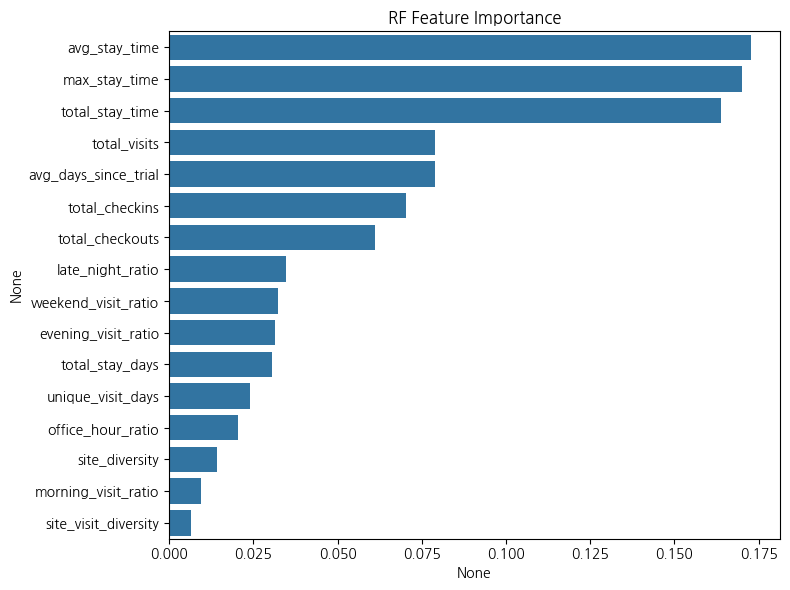

In [48]:
feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("RF Feature Importance")
plt.tight_layout()
plt.show()

### SMOTE Ï†ÅÏö©

In [49]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

model_sm = RandomForestClassifier(random_state=42)
model_sm.fit(X_res, y_res)
print(classification_report(y_test, model_sm.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.71      0.74      0.72       840
         1.0       0.49      0.44      0.47       468

    accuracy                           0.64      1308
   macro avg       0.60      0.59      0.59      1308
weighted avg       0.63      0.64      0.63      1308



In [50]:
# ÌîºÏ≤ò Ï§ëÏöîÎèÑ Ï∂îÏ∂ú
feature_importance = pd.Series(model_sm.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

# Ï§ëÏöîÎèÑ ÌÖåÏù¥Î∏î Ï∂úÎ†•
importance_df = feature_importance.reset_index()
importance_df.columns = ["feature", "importance"]
print(importance_df)

                 feature  importance
0          avg_stay_time    0.142563
1          max_stay_time    0.138264
2        total_stay_time    0.134212
3   avg_days_since_trial    0.093449
4         total_checkins    0.069817
5    evening_visit_ratio    0.068405
6           total_visits    0.065011
7        total_checkouts    0.063539
8       late_night_ratio    0.055213
9    weekend_visit_ratio    0.051085
10     unique_visit_days    0.031898
11     office_hour_ratio    0.026868
12       total_stay_days    0.026724
13        site_diversity    0.014296
14   morning_visit_ratio    0.009547
15  site_visit_diversity    0.009109


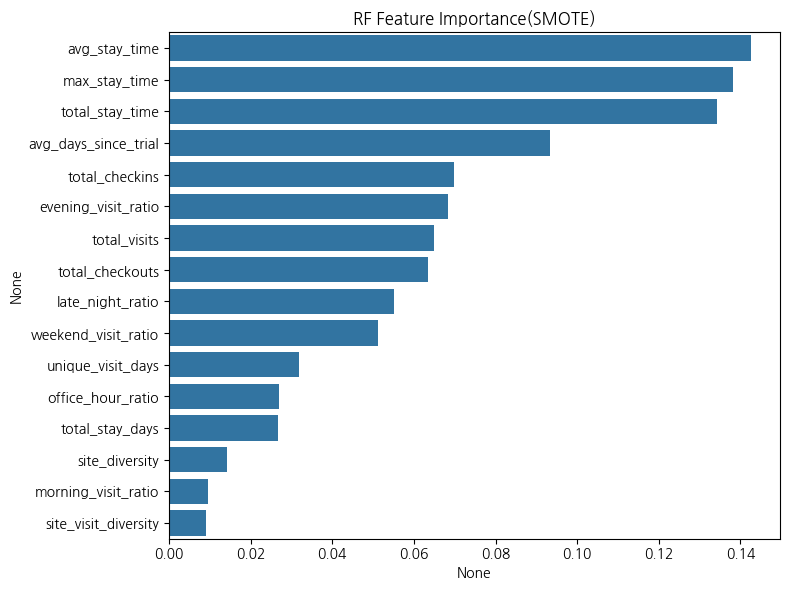

In [51]:
feat_imp = pd.Series(model_sm.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("RF Feature Importance(SMOTE)")
plt.tight_layout()
plt.show()

### ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù

In [52]:
from sklearn.model_selection import GridSearchCV

```python
# ÌäúÎãùÌï† ÌååÎùºÎØ∏ÌÑ∞ Í∑∏Î¶¨Îìú Ï†ïÏùò
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"],
}

# ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏ Í∞ùÏ≤¥
rf_base = RandomForestClassifier(random_state=42, class_weight="balanced")

# GridSearchCV Í∞ùÏ≤¥ ÏÉùÏÑ±
grid_search = GridSearchCV(estimator=rf_base, param_grid=param_grid, scoring="roc_auc", cv=3, n_jobs=-1, verbose=2)

# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù Ïã§Ìñâ
grid_search.fit(X_res, y_res)

# ÏµúÏ†Å Î™®Îç∏ Ï∂îÏ∂ú
best_rf = grid_search.best_estimator_

print("‚úÖ ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞:")
print(grid_search.best_params_)
```

```python
# ÌäúÎãùÌï† ÌååÎùºÎØ∏ÌÑ∞ Í∑∏Î¶¨Îìú Ï†ïÏùò
param_grid = {
    "n_estimators": [200, 300, 400],
    "max_depth": [20, 30, 40],
    "min_samples_split": [2, 3, 4],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt"],
}

# ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏ Í∞ùÏ≤¥
rf_base = RandomForestClassifier(random_state=42, class_weight="balanced")

# GridSearchCV Í∞ùÏ≤¥ ÏÉùÏÑ±
grid_search = GridSearchCV(estimator=rf_base, param_grid=param_grid, scoring="roc_auc", cv=3, n_jobs=-1, verbose=2)

# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù Ïã§Ìñâ
grid_search.fit(X_res, y_res)

# ÏµúÏ†Å Î™®Îç∏ Ï∂îÏ∂ú
best_rf = grid_search.best_estimator_

print("‚úÖ ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞:")
print(grid_search.best_params_)
```

In [53]:
# ÌäúÎãùÌï† ÌååÎùºÎØ∏ÌÑ∞ Í∑∏Î¶¨Îìú Ï†ïÏùò
param_grid = {
    "n_estimators": [550],
    "max_depth": [20],
    "min_samples_split": [2],
    "min_samples_leaf": [1],
    "max_features": ["sqrt"],
}

# ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏ Í∞ùÏ≤¥
rf_base = RandomForestClassifier(random_state=42, class_weight="balanced")

# GridSearchCV Í∞ùÏ≤¥ ÏÉùÏÑ±
grid_search = GridSearchCV(estimator=rf_base, param_grid=param_grid, scoring="roc_auc", cv=3, n_jobs=-1, verbose=2)

# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù Ïã§Ìñâ
grid_search.fit(X_res, y_res)

# ÏµúÏ†Å Î™®Îç∏ Ï∂îÏ∂ú
best_rf = grid_search.best_estimator_

print("‚úÖ ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞:")
print(grid_search.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
‚úÖ ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞:
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 550}


In [54]:
# ÌÖåÏä§Ìä∏ÏÖãÏóê ÎåÄÌï¥ ÏòàÏ∏° ÏàòÌñâ
y_pred = best_rf.predict(X_test)

# classification report Ï∂úÎ†•
print(classification_report(y_test, y_pred, digits=2))

              precision    recall  f1-score   support

         0.0       0.71      0.74      0.73       840
         1.0       0.50      0.45      0.47       468

    accuracy                           0.64      1308
   macro avg       0.60      0.60      0.60      1308
weighted avg       0.63      0.64      0.64      1308



```
# ÌäúÎãù Ï†Ñ

              precision    recall  f1-score   support

         0.0       0.71      0.74      0.72       840
         1.0       0.49      0.44      0.46       468

    accuracy                           0.64      1308
   macro avg       0.60      0.59      0.59      1308
weighted avg       0.63      0.64      0.63      1308
```

1. Accuracy (Ï†ïÌôïÎèÑ)
    - ÌäúÎãù Ï†Ñ: 0.64
    - ÌäúÎãù ÌõÑ: 0.63
        
        ‚Üí 0.01 ÌïòÎùΩ

2. ÌÅ¥ÎûòÏä§Î≥Ñ ÏÑ±Îä• ÎπÑÍµê
- ÌÅ¥ÎûòÏä§ 0.0 (ÎπÑÍ∞ÄÏûÖ ÏòàÏ∏°)

|ÏßÄÌëú|ÌäúÎãù Ï†Ñ|ÌäúÎãù ÌõÑ|Î≥ÄÌôî|
|---|---|---|---|
|Precision|0.70|0.71|‚ñ≤ +0.01|
|Recall|0.75|0.74|‚ñº -0.01|
|F1-score|0.72|0.72|‚Üí ÎèôÏùº|

- ÌÅ¥ÎûòÏä§ 1.0 (Í∞ÄÏûÖ ÏòàÏ∏° - ÏÜåÏàò ÌÅ¥ÎûòÏä§)

|ÏßÄÌëú|ÌäúÎãù Ï†Ñ|ÌäúÎãù ÌõÑ|Î≥ÄÌôî|
|---|---|---|---|
|Precision|0.48|0.49|‚ñ≤ +0.01|
|Recall|0.42|0.44|‚ñ≤ +0.02|
|F1-score|0.45|0.46|‚ñ≤ +0.01|

3. ÌèâÍ∑† ÏÑ±Îä• (Macro / Weighted Avg)

|ÏßÄÌëú|ÌäúÎãù Ï†Ñ|ÌäúÎãù ÌõÑ|Î≥ÄÌôî|
|---|---|---|---|
|Macro F1|0.59|0.59|‚Üí ÎèôÏùº|
|Weighted F1|0.63|0.63|‚Üí ÎèôÏùº|

- Ìï¥ÏÑù ÏöîÏïΩ
    - ÌäúÎãù ÌõÑ ÏïΩÍ∞ÑÏùò ÏÑ±Îä• Ìñ•ÏÉÅÏù¥ ÏûàÏúºÎÇò Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú ÌÅ∞ Î≥ÄÌôîÎäî ÏóÜÏùå
    - ÌäπÌûà Í∞ÄÏûÖ ÏòàÏ∏° ÌÅ¥ÎûòÏä§(1.0)Ïùò recallÏù¥ ÏÜåÌè≠ Ìñ•ÏÉÅÎêòÏóàÏßÄÎßå, Ïó¨Ï†ÑÌûà precisionÍ≥º recall Î™®Îëê ÎÇÆÏïÑ ÏÜåÏàò ÌÅ¥ÎûòÏä§ ÏòàÏ∏° ÏÑ±Îä•Ïù¥ Î∂ÄÏ°±Ìï®
    - Macro ÌèâÍ∑†Ïù¥ Í∑∏ÎåÄÎ°úÏù∏ Ï†êÏùÑ Î≥¥Î©¥ Î™®Îì† ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌïú Ï†ÑÎ∞òÏ†ÅÏù∏ Í∑†Ìòï Í∞úÏÑ†ÏùÄ ÏïÑÏßÅ ÎØ∏ÎØ∏Ìï®

- Îã§Ïùå Í∞úÏÑ† Î∞©Ìñ• Ï†úÏïà
    - Î¶¨ÏΩú Ï§ëÏã¨Ïùò threshold Ï°∞Ï†ï (ÌäπÌûà ÌÅ¥ÎûòÏä§ 1.0Ïùò ÎØºÍ∞êÎèÑ Ï§ëÏöî Ïãú)
    - ÏïôÏÉÅÎ∏î Í∏∞Î≤ï ÎèÑÏûÖ: Ïòà) RandomForest + XGBoost soft voting
    - Îçî ÎßéÏùÄ ÌååÏÉù Î≥ÄÏàò(feature engineering) ÏÉùÏÑ±

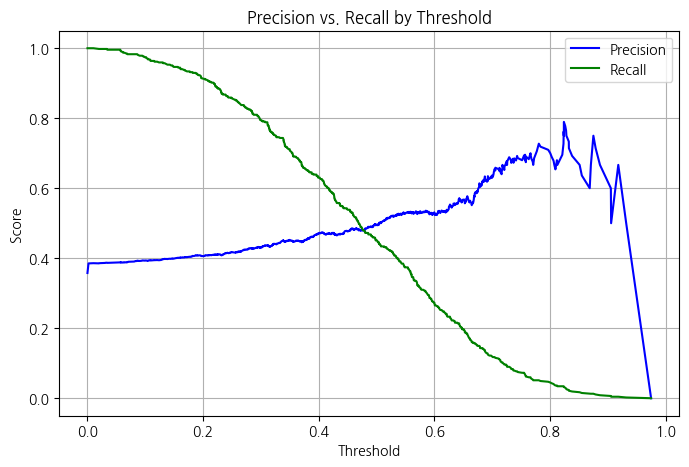

In [55]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# ÏñëÏÑ± ÌÅ¥ÎûòÏä§ ÌôïÎ•† ÏòàÏ∏°
y_scores = best_rf.predict_proba(X_test)[:, 1]

# precision, recall, threshold Í≥ÑÏÇ∞
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

# Precision vs. Recall by Threshold plot
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precisions[:-1], label="Precision", color="b")
plt.plot(thresholds, recalls[:-1], label="Recall", color="g")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision vs. Recall by Threshold")
plt.legend()
plt.grid()
plt.show()

üéØ PrecisionÏù¥ Ï§ëÏöîÌïú Í≤ΩÏö∞
ÏòàÏ∏°Ìïú ‚ÄúÍ≤∞Ï†úÌï† ÏÇ¨Îûå‚Äù Ï§ë Ïã§Ï†ú Í≤∞Ï†úÏûêÍ∞Ä Ï†ïÌôïÌïòÍ≤å ÎßûÏïÑÏïº ÌïòÎäî Í≤ΩÏö∞

Ïòà: ÌÉÄÍ≤ü Ïò§Ìçº ÎπÑÏö©Ïù¥ ÎπÑÏã∏Îã§Í±∞ÎÇò, ÏÉÅÎã¥ Î¶¨ÏÜåÏä§Í∞Ä ÌïúÏ†ïÎêòÏñ¥ ÏûòÎ™ª Ï∂îÏ≤úÎêòÎ©¥ ÎÇ≠ÎπÑÎêòÎäî Í≤ΩÏö∞

üéØ RecallÏù¥ Ï§ëÏöîÌïú Í≤ΩÏö∞
Ïã§Ï†ú Í≤∞Ï†úÌï† ÏÇ¨ÎûåÏùÑ ÏµúÎåÄÌïú ÎßéÏù¥ Ïû°ÏïÑÏïº ÌïòÎäî Í≤ΩÏö∞

Ïòà: Ï†ÑÌôòÏú® ÏûêÏ≤¥Î•º ÎÅåÏñ¥Ïò¨Î¶¨Îäî Í≤å Îçî Ï§ëÏöîÌïòÍ±∞ÎÇò, ÎÜìÏπòÎäî Í≥†Í∞ùÏù¥ Í∏∞ÌöåÎπÑÏö©Ïù¥ ÌÅ¨Îã§Í≥† ÌåêÎã®Îê† Îïå

- Precision Î∞±ÌôîÏ†ê (VIP Ïø†Ìè∞)

- Recall ÌÖåÎ¨¥ ÏïåÎ¶¨ (Ï†Ñ ÌöåÏõê Ïø†Ìè∞)

- Ïñ¥Ï∞®Ìîº ÌïòÍ≥† ÏûàÎäî ÌîÑÎ°úÎ™®ÏÖòÏù¥ÎãàÍπê Ìï¥Îãπ ÌîÑÎ°úÎ™®ÏÖòÏùò Ï†ÑÌôòÎ•†ÏùÑ ÎÜíÏù¥Ïûê
    - Recall ÎÜíÏù¥Ïûê

In [56]:
# ÌôïÎ•† ÏòàÏ∏°
y_proba = best_rf.predict_proba(X_test)[:, 1]

# Threshold = 0.41Î°ú Ï°∞Ï†ï
y_pred_threshold = (y_proba >= 0.41).astype(int)

# classification report Ï∂úÎ†•
print(classification_report(y_test, y_pred_threshold, digits=2))

              precision    recall  f1-score   support

         0.0       0.74      0.62      0.67       840
         1.0       0.47      0.61      0.53       468

    accuracy                           0.61      1308
   macro avg       0.60      0.61      0.60      1308
weighted avg       0.64      0.61      0.62      1308



## XGB

In [57]:
from xgboost import XGBClassifier

# XGBoost Î™®Îç∏ Ï†ïÏùò
xgb_sm = XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)

# SMOTEÎ°ú Ïò§Î≤ÑÏÉòÌîåÎßÅÎêú Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµ
xgb_sm.fit(X_res, y_res)

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ ÏòàÏ∏° Î∞è ÏÑ±Îä• ÌèâÍ∞Ä
y_pred_xgb = xgb_sm.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.70      0.77      0.73       840
         1.0       0.49      0.39      0.44       468

    accuracy                           0.64      1308
   macro avg       0.59      0.58      0.58      1308
weighted avg       0.62      0.64      0.63      1308



### ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù

```python
# ÌäúÎãùÌï† ÌååÎùºÎØ∏ÌÑ∞ Í∑∏Î¶¨Îìú Ï†ïÏùò
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

# XGBClassifier Í∞ùÏ≤¥ ÏÉùÏÑ±
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)

# GridSearchCV Í∞ùÏ≤¥ ÏÉùÏÑ±
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=3,
    verbose=2,
    n_jobs=-1
)

# SMOTE Ï†ÅÏö©Îêú Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµ
grid_search.fit(X_res, y_res)

# ÏµúÏ†Å Î™®Îç∏ Î∞è ÌååÎùºÎØ∏ÌÑ∞ Ï∂úÎ†•
best_xgb = grid_search.best_estimator_
print("‚úÖ ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞:")
print(grid_search.best_params_)
```

```
‚úÖ ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞:
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
```

```python
# ÌäúÎãùÌï† ÌååÎùºÎØ∏ÌÑ∞ Í∑∏Î¶¨Îìú Ï†ïÏùò
param_grid = {
    "n_estimators": [200, 300, 400],
    "max_depth": [7, 9, 11],
    "learning_rate": [0.1, 0.2],
    "subsample": [0.6, 0,7, 0.8],
    "colsample_bytree": [1.0]
}

# XGBClassifier Í∞ùÏ≤¥ ÏÉùÏÑ±
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)

# GridSearchCV Í∞ùÏ≤¥ ÏÉùÏÑ±
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=3,
    verbose=2,
    n_jobs=-1
)

# SMOTE Ï†ÅÏö©Îêú Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµ
grid_search.fit(X_res, y_res)

# ÏµúÏ†Å Î™®Îç∏ Î∞è ÌååÎùºÎØ∏ÌÑ∞ Ï∂úÎ†•
best_xgb = grid_search.best_estimator_
print("‚úÖ ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞:")
print(grid_search.best_params_)
```

```
‚úÖ ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞:
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
```

```python
# ÌäúÎãùÌï† ÌååÎùºÎØ∏ÌÑ∞ Í∑∏Î¶¨Îìú Ï†ïÏùò
param_grid = {
    "n_estimators": [200],
    "max_depth": [7],
    "learning_rate": [0.1],
    "subsample": [0.8, 0.9, 1.0],
    "colsample_bytree": [1.0]
}

# XGBClassifier Í∞ùÏ≤¥ ÏÉùÏÑ±
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)

# GridSearchCV Í∞ùÏ≤¥ ÏÉùÏÑ±
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=3,
    verbose=2,
    n_jobs=-1
)

# SMOTE Ï†ÅÏö©Îêú Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµ
grid_search.fit(X_res, y_res)

# ÏµúÏ†Å Î™®Îç∏ Î∞è ÌååÎùºÎØ∏ÌÑ∞ Ï∂úÎ†•
best_xgb = grid_search.best_estimator_
print("‚úÖ ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞:")
print(grid_search.best_params_)
```

```
‚úÖ ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞:
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
```

### best_xgb

In [58]:
# ÌäúÎãùÌï† ÌååÎùºÎØ∏ÌÑ∞ Í∑∏Î¶¨Îìú Ï†ïÏùò
param_grid = {
    "n_estimators": [200],
    "max_depth": [7],
    "learning_rate": [0.1],
    "subsample": [0.8],
    "colsample_bytree": [1.0]
}

# XGBClassifier Í∞ùÏ≤¥ ÏÉùÏÑ±
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)

# GridSearchCV Í∞ùÏ≤¥ ÏÉùÏÑ±
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=3,
    verbose=2,
    n_jobs=-1
)

# SMOTE Ï†ÅÏö©Îêú Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµ
grid_search.fit(X_res, y_res)

# ÏµúÏ†Å Î™®Îç∏ Î∞è ÌååÎùºÎØ∏ÌÑ∞ Ï∂úÎ†•
best_xgb = grid_search.best_estimator_
print("‚úÖ ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞:")
print(grid_search.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
‚úÖ ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞:
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}


### Í≥†Í∏â ÌååÎùºÎØ∏ÌÑ∞ Ï∂îÍ∞Ä ÌäúÎãù

```python
param_grid_refined = {
    "min_child_weight": [1, 5, 10],
    "gamma": [0, 1, 5],
    "reg_alpha": [0, 0.1, 1],
    "reg_lambda": [1, 5, 10]
}

xgb_refined = XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42,
    colsample_bytree=1.0,
    learning_rate=0.1,
    max_depth=7,
    n_estimators=200,
    subsample=0.8
)

grid_search_refined = GridSearchCV(
    estimator=xgb_refined,
    param_grid=param_grid_refined,
    scoring="roc_auc",
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search_refined.fit(X_res, y_res)

best_xgb_refined = grid_search_refined.best_estimator_
print("üéØ Ï†ïÍ∑úÌôî ÌååÎùºÎØ∏ÌÑ∞ Ìè¨Ìï® ÏµúÏ†Å Ï°∞Ìï©:")
print(grid_search_refined.best_params_)
```

```
üéØ Ï†ïÍ∑úÌôî ÌååÎùºÎØ∏ÌÑ∞ Ìè¨Ìï® ÏµúÏ†Å Ï°∞Ìï©:
{'gamma': 1, 'min_child_weight': 1, 'reg_alpha': 0, 'reg_lambda': 1}
```

In [59]:
param_grid_refined = {
    "min_child_weight": [1],
    "gamma": [1],
    "reg_alpha": [0],
    "reg_lambda": [1]
}

xgb_refined = XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42,
    colsample_bytree=1.0,
    learning_rate=0.1,
    max_depth=7,
    n_estimators=200,
    subsample=0.8
)

grid_search_refined = GridSearchCV(
    estimator=xgb_refined,
    param_grid=param_grid_refined,
    scoring="roc_auc",
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search_refined.fit(X_res, y_res)

best_xgb_refined = grid_search_refined.best_estimator_
print("üéØ Ï†ïÍ∑úÌôî ÌååÎùºÎØ∏ÌÑ∞ Ìè¨Ìï® ÏµúÏ†Å Ï°∞Ìï©:")
print(grid_search_refined.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
üéØ Ï†ïÍ∑úÌôî ÌååÎùºÎØ∏ÌÑ∞ Ìè¨Ìï® ÏµúÏ†Å Ï°∞Ìï©:
{'gamma': 1, 'min_child_weight': 1, 'reg_alpha': 0, 'reg_lambda': 1}


In [60]:
# ÌÖåÏä§Ìä∏ÏÖãÏóê ÎåÄÌï¥ ÏòàÏ∏° ÏàòÌñâ
y_pred = best_xgb_refined.predict(X_test)

# classification report Ï∂úÎ†•
print(classification_report(y_test, y_pred, digits=2))

              precision    recall  f1-score   support

         0.0       0.71      0.78      0.74       840
         1.0       0.51      0.42      0.46       468

    accuracy                           0.65      1308
   macro avg       0.61      0.60      0.60      1308
weighted avg       0.64      0.65      0.64      1308



## RandomForest + XGBoost soft voting

In [61]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Soft Voting Classifier ÏÉùÏÑ±
voting_clf = VotingClassifier(
    estimators=[("rf", best_rf), ("xgb", best_xgb_refined)],
    voting="soft"
)

# ÌïôÏäµ
voting_clf.fit(X_train, y_train)

# ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = voting_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.70      0.80      0.75       840
         1.0       0.51      0.37      0.43       468

    accuracy                           0.65      1308
   macro avg       0.60      0.59      0.59      1308
weighted avg       0.63      0.65      0.63      1308



### best_rfÏôÄ ÎπÑÍµê (Î™®Îç∏ ÌôïÏ†ï best_rf)

```
              precision    recall  f1-score   support

         0.0       0.74      0.62      0.67       840
         1.0       0.47      0.61      0.53       468

    accuracy                           0.61      1308
   macro avg       0.60      0.61      0.60      1308
weighted avg       0.64      0.61      0.62      1308
```

- best_rf ÏÑ†ÌÉù Ïù¥Ïú†
    - 3Ïùº Î¨¥Î£åÏ≤¥Ìóò ÌîÑÎ°úÎ™®ÏÖò (Ïù¥ÎØ∏ ÏßÑÌñâ Ï§ë)
    - Îç∞Ïù¥ÌÑ∞ÏÖã (3Ïùº Î¨¥Î£åÏ≤¥Ìóò Ïã†Ï≤≠ Ïù¥Ï†ÑÏùò ÌñâÎèô Ïïå Ïàò ÏóÜÏùå)
    - Ïù¥ÎØ∏ ÏßÑÌñâ Ï§ëÏù∏ ÌîÑÎ°úÎ™®ÏÖò + Ïù¥Ï†Ñ ÌñâÎèô Ïïå Ïàò ÏóÜÏùå
        - ÏßÑÌñâ Ï§ëÏù∏ ÌîÑÎ°úÎ™®ÏÖò ÎÇ¥ÏóêÏÑú Í≤∞Ï†úÎ°úÏùò Ï†ÑÌôòÎ•†ÏùÑ ÎÜíÏù¥Îäî Î∞©Ìñ•ÏúºÎ°ú Î™®Îç∏ Í∞úÏÑ†
    
- XGB, soft voting Í∏∞Í∞Å Ïù¥Ïú†
    - Ï†ïÌôïÎèÑÏôÄ ÌèâÍ∑† ÏÑ±Îä•ÏùÄ ÏïΩÍ∞Ñ ÏÉÅÏäπÌñàÏßÄÎßå
    - ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏Ïóê ÎπÑÌï¥ RecallÎ≥¥Îã§Îäî PrecisionÏóê Îçî ÎÜíÏùÄ ÏàòÏπòÎ•º Î≥¥ÏûÑ
    - ÏòàÏ∏°ÌïòÍ≥†Ïûê ÌïòÎäî Î∞©Ìñ•ÏÑ±Í≥º ÎßûÏßÄ ÏïäÏùå

- Recall Ï§ëÏ†ê(ÌÖåÎ¨¥ ÏïåÎ¶¨ Ï†Ñ ÌöåÏõê Ïø†Ìè∞): Ïã§Ï†ú Í≤∞Ï†úÌï† ÏÇ¨ÎûåÏùÑ ÏµúÎåÄÌïú ÎßéÏù¥ Î∂ôÏû°Ïûê!
    - Ïñ¥Ï∞®Ìîº ÌïòÍ≥† ÏûàÎäî ÌîÑÎ°úÎ™®ÏÖòÏù¥Îãà Ìï¥Îãπ ÌîÑÎ°úÎ™®ÏÖò ÎÇ¥ÏóêÏÑú Ï†ÑÌôòÎ•†ÏùÑ ÎÜíÏù¥Îäî Í≤ÉÏùÑ Î™©Ï†ÅÏúºÎ°ú